In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
#NEED THIS TO RUN DEEP LEARNING
tf.config.set_visible_devices([], 'GPU')

# Data Preprocessing

In [3]:
# Training set with rules defined
training_set = tf.keras.utils.image_dataset_from_directory(
    '/Users/HP/Documents/PYTHONCODES/DATASETS/FRUITS&VEGGIE(NOOVERSAMPLING)/train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
    
)

Found 2569 files belonging to 2 classes.


In [4]:
# Validation set with rules defined
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/Users/HP/Documents/PYTHONCODES/DATASETS/FRUITS&VEGGIE(NOOVERSAMPLING)/validation',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
    
)

Found 312 files belonging to 2 classes.


In [68]:
# Test set with rules defined
test_set = tf.keras.utils.image_dataset_from_directory(
    '/Users/HP/Documents/PYTHONCODES/DATASETS/FRUITS&VEGGIE(NOOVERSAMPLING)/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 320 files belonging to 2 classes.


# CNN (BaseLine)

In [6]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.6))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

cnn.add(tf.keras.layers.Dense(units=2,activation='softmax'))


In [7]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0

In [9]:
# training with 10 epochs
training_history = cnn.fit(x=training_set,validation_data=validation_set, epochs=10)

Epoch 1/10
 2/81 [..............................] - ETA: 22s - loss: 1012.8309 - accuracy: 0.5156

2023-11-26 13:00:10.430887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:00:10.627120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/81 [==>...........................] - ETA: 16s - loss: 233.3538 - accuracy: 0.6042

2023-11-26 13:00:11.954491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/81 [===>..........................] - ETA: 19s - loss: 175.3687 - accuracy: 0.6250

2023-11-26 13:00:13.339920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



13/81 [===>..........................] - ETA: 20s - loss: 161.9556 - accuracy: 0.6274

2023-11-26 13:00:13.728795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/81 [=====>........................] - ETA: 17s - loss: 117.2668 - accuracy: 0.6146

2023-11-26 13:00:14.912405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/81 [=======>......................] - ETA: 17s - loss: 96.1321 - accuracy: 0.6080 

2023-11-26 13:00:16.338523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/81 [=========>....................] - ETA: 14s - loss: 75.6924 - accuracy: 0.6150

2023-11-26 13:00:17.747280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:00:17.899553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/81 [==========>...................] - ETA: 13s - loss: 66.3299 - accuracy: 0.6201

2023-11-26 13:00:18.732675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/81 [============>.................] - ETA: 11s - loss: 59.0436 - accuracy: 0.6181

2023-11-26 13:00:19.283043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:00:19.393754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:00:19.434873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/81 [=============>................] - ETA: 10s - loss: 53.2469 - accuracy: 0.6187

2023-11-26 13:00:20.182598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:00:20.507977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/81 [==================>...........] - ETA: 7s - loss: 40.3612 - accuracy: 0.6285

2023-11-26 13:00:23.488570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/81 [=====================>........] - ETA: 5s - loss: 35.1602 - accuracy: 0.6301

2023-11-26 13:00:25.511131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/81 [======================>.......] - ETA: 4s - loss: 34.0710 - accuracy: 0.6319

2023-11-26 13:00:26.005702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/81 [=======================>......] - ETA: 3s - loss: 32.0848 - accuracy: 0.6269

2023-11-26 13:00:26.987270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/81 [========================>.....] - ETA: 3s - loss: 31.1752 - accuracy: 0.6268

2023-11-26 13:00:27.220866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/81 [============================>.] - ETA: 0s - loss: 27.0008 - accuracy: 0.6348

2023-11-26 13:00:29.273645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:00:30.730409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/81 [==============================] - 23s 267ms/step - loss: 26.9086 - accuracy: 0.6357 - val_loss: 0.6879 - val_accuracy: 0.6571
Epoch 2/10
 3/81 [>.............................] - ETA: 15s - loss: 0.7322 - accuracy: 0.6562

2023-11-26 13:00:33.589494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:00:33.784112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/81 [==>...........................] - ETA: 16s - loss: 0.7551 - accuracy: 0.6771

2023-11-26 13:00:35.075394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/81 [===>..........................] - ETA: 19s - loss: 0.8545 - accuracy: 0.6693

2023-11-26 13:00:36.490782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



13/81 [===>..........................] - ETA: 20s - loss: 0.8431 - accuracy: 0.6755

2023-11-26 13:00:36.884143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/81 [=====>........................] - ETA: 17s - loss: 0.8359 - accuracy: 0.6875

2023-11-26 13:00:38.102512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/81 [=======>......................] - ETA: 17s - loss: 0.8067 - accuracy: 0.6918

2023-11-26 13:00:39.465699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/81 [=========>....................] - ETA: 14s - loss: 0.7848 - accuracy: 0.7042

2023-11-26 13:00:40.897169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:00:41.054501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/81 [==========>...................] - ETA: 13s - loss: 0.7652 - accuracy: 0.7051

2023-11-26 13:00:41.872542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/81 [===========>..................] - ETA: 12s - loss: 0.7433 - accuracy: 0.7107

2023-11-26 13:00:42.416941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:00:42.542981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:00:42.574989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/81 [=============>................] - ETA: 10s - loss: 0.7702 - accuracy: 0.7059

2023-11-26 13:00:43.307966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



40/81 [=============>................] - ETA: 10s - loss: 0.7672 - accuracy: 0.7070

2023-11-26 13:00:43.625882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/81 [==================>...........] - ETA: 7s - loss: 0.7419 - accuracy: 0.6975

2023-11-26 13:00:46.629888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/81 [=====================>........] - ETA: 5s - loss: 0.8345 - accuracy: 0.6977

2023-11-26 13:00:48.564729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/81 [======================>.......] - ETA: 4s - loss: 0.8280 - accuracy: 0.6974

2023-11-26 13:00:49.037937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/81 [=======================>......] - ETA: 3s - loss: 0.8186 - accuracy: 0.6954

2023-11-26 13:00:49.993880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



68/81 [========================>.....] - ETA: 3s - loss: 0.8167 - accuracy: 0.6944

2023-11-26 13:00:50.234459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/81 [============================>.] - ETA: 0s - loss: 0.7845 - accuracy: 0.6984

2023-11-26 13:00:52.248400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:00:53.684839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/81 [==============================] - 23s 263ms/step - loss: 0.7833 - accuracy: 0.6991 - val_loss: 0.7625 - val_accuracy: 0.6571
Epoch 3/10
 2/81 [..............................] - ETA: 23s - loss: 0.6588 - accuracy: 0.7188 

2023-11-26 13:00:56.559651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 3/81 [>.............................] - ETA: 16s - loss: 0.6389 - accuracy: 0.6979

2023-11-26 13:00:56.775029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/81 [==>...........................] - ETA: 16s - loss: 0.6003 - accuracy: 0.7049

2023-11-26 13:00:58.081527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/81 [===>..........................] - ETA: 19s - loss: 0.5949 - accuracy: 0.7135

2023-11-26 13:00:59.526618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



13/81 [===>..........................] - ETA: 20s - loss: 0.5942 - accuracy: 0.7115

2023-11-26 13:00:59.920869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/81 [=====>........................] - ETA: 17s - loss: 0.5926 - accuracy: 0.7118

2023-11-26 13:01:01.119259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/81 [=======>......................] - ETA: 17s - loss: 0.5883 - accuracy: 0.7188

2023-11-26 13:01:02.531781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/81 [=========>....................] - ETA: 15s - loss: 0.6004 - accuracy: 0.7299

2023-11-26 13:01:04.019270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:01:04.175735: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/81 [==========>...................] - ETA: 13s - loss: 0.6050 - accuracy: 0.7256

2023-11-26 13:01:05.023471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/81 [===========>..................] - ETA: 12s - loss: 0.5969 - accuracy: 0.7268

2023-11-26 13:01:05.577742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:01:05.706760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:01:05.746546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/81 [=============>................] - ETA: 11s - loss: 0.6012 - accuracy: 0.7252

2023-11-26 13:01:06.542248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



40/81 [=============>................] - ETA: 10s - loss: 0.5988 - accuracy: 0.7258

2023-11-26 13:01:06.906217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/81 [==================>...........] - ETA: 7s - loss: 0.6019 - accuracy: 0.7146

2023-11-26 13:01:10.036357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/81 [=====================>........] - ETA: 5s - loss: 0.6305 - accuracy: 0.7141

2023-11-26 13:01:11.919370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/81 [======================>.......] - ETA: 4s - loss: 0.6295 - accuracy: 0.7153

2023-11-26 13:01:12.394935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/81 [=======================>......] - ETA: 3s - loss: 0.6286 - accuracy: 0.7146

2023-11-26 13:01:13.316113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/81 [========================>.....] - ETA: 3s - loss: 0.6240 - accuracy: 0.7174

2023-11-26 13:01:13.542498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/81 [============================>.] - ETA: 0s - loss: 0.6141 - accuracy: 0.7160

2023-11-26 13:01:15.592031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:01:17.189142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/81 [==============================] - 24s 273ms/step - loss: 0.6135 - accuracy: 0.7158 - val_loss: 0.6641 - val_accuracy: 0.6571
Epoch 4/10
 2/81 [..............................] - ETA: 27s - loss: 0.5406 - accuracy: 0.7344 

2023-11-26 13:01:20.838277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 3/81 [>.............................] - ETA: 22s - loss: 0.5277 - accuracy: 0.7292

2023-11-26 13:01:21.095912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/81 [==>...........................] - ETA: 18s - loss: 0.5457 - accuracy: 0.7222

2023-11-26 13:01:22.459850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/81 [===>..........................] - ETA: 20s - loss: 0.5493 - accuracy: 0.7240

2023-11-26 13:01:23.904248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



13/81 [===>..........................] - ETA: 21s - loss: 0.5560 - accuracy: 0.7260

2023-11-26 13:01:24.302361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/81 [=====>........................] - ETA: 18s - loss: 0.5509 - accuracy: 0.7257

2023-11-26 13:01:25.534786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/81 [=======>......................] - ETA: 18s - loss: 0.5457 - accuracy: 0.7301

2023-11-26 13:01:27.139294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/81 [=========>....................] - ETA: 16s - loss: 0.5396 - accuracy: 0.7243

2023-11-26 13:01:28.818749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:01:28.975083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/81 [==========>...................] - ETA: 14s - loss: 0.5554 - accuracy: 0.7197

2023-11-26 13:01:29.980189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/81 [===========>..................] - ETA: 13s - loss: 0.5505 - accuracy: 0.7214

2023-11-26 13:01:30.656144: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:01:30.811795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:01:30.851905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/81 [=============>................] - ETA: 11s - loss: 0.6318 - accuracy: 0.7188

2023-11-26 13:01:31.645333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:01:31.975222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/81 [==================>...........] - ETA: 8s - loss: 0.6192 - accuracy: 0.7123

2023-11-26 13:01:35.627111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/81 [=====================>........] - ETA: 5s - loss: 0.6120 - accuracy: 0.7090

2023-11-26 13:01:37.764293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/81 [======================>.......] - ETA: 5s - loss: 0.6122 - accuracy: 0.7093

2023-11-26 13:01:38.279588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/81 [=======================>......] - ETA: 3s - loss: 0.6070 - accuracy: 0.7080

2023-11-26 13:01:39.253160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/81 [========================>.....] - ETA: 3s - loss: 0.6037 - accuracy: 0.7111

2023-11-26 13:01:39.485280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/81 [==============================] - ETA: 0s - loss: 0.6024 - accuracy: 0.7112

2023-11-26 13:01:41.528263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:01:43.028995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/81 [==============================] - 26s 290ms/step - loss: 0.6024 - accuracy: 0.7112 - val_loss: 0.5794 - val_accuracy: 0.6571
Epoch 5/10
 3/81 [>.............................] - ETA: 16s - loss: 0.6007 - accuracy: 0.6875

2023-11-26 13:01:45.944751: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:01:46.156248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/81 [==>...........................] - ETA: 17s - loss: 0.5437 - accuracy: 0.7222

2023-11-26 13:01:47.538941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/81 [===>..........................] - ETA: 20s - loss: 0.5299 - accuracy: 0.7292

2023-11-26 13:01:48.971808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



13/81 [===>..........................] - ETA: 21s - loss: 0.5299 - accuracy: 0.7284

2023-11-26 13:01:49.367166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/81 [=====>........................] - ETA: 18s - loss: 0.6304 - accuracy: 0.7031

2023-11-26 13:01:50.590823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/81 [=======>......................] - ETA: 18s - loss: 0.6131 - accuracy: 0.7074

2023-11-26 13:01:52.052684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/81 [=========>....................] - ETA: 15s - loss: 0.6009 - accuracy: 0.7076

2023-11-26 13:01:53.568408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:01:53.728416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/81 [==========>...................] - ETA: 14s - loss: 0.5876 - accuracy: 0.7139

2023-11-26 13:01:54.591906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/81 [===========>..................] - ETA: 12s - loss: 0.5802 - accuracy: 0.7161

2023-11-26 13:01:55.151023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:01:55.291157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:01:55.329966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/81 [=============>................] - ETA: 11s - loss: 0.5688 - accuracy: 0.7155

2023-11-26 13:01:56.149960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



40/81 [=============>................] - ETA: 11s - loss: 0.5669 - accuracy: 0.7164

2023-11-26 13:01:56.481715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/81 [==================>...........] - ETA: 7s - loss: 0.5638 - accuracy: 0.7105

2023-11-26 13:01:59.606480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/81 [=====================>........] - ETA: 5s - loss: 0.5653 - accuracy: 0.7126

2023-11-26 13:02:01.594089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/81 [======================>.......] - ETA: 4s - loss: 0.5668 - accuracy: 0.7113

2023-11-26 13:02:02.095452: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/81 [=======================>......] - ETA: 3s - loss: 0.5677 - accuracy: 0.7146

2023-11-26 13:02:03.080095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/81 [========================>.....] - ETA: 3s - loss: 0.5672 - accuracy: 0.7156

2023-11-26 13:02:03.313884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/81 [============================>.] - ETA: 0s - loss: 0.5644 - accuracy: 0.7152

2023-11-26 13:02:05.440946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:02:06.946420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/81 [==============================] - 24s 275ms/step - loss: 0.5647 - accuracy: 0.7151 - val_loss: 5.8888 - val_accuracy: 0.3878
Epoch 6/10
 2/81 [..............................] - ETA: 26s - loss: 4.6321 - accuracy: 0.6094 

2023-11-26 13:02:10.002085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 3/81 [>.............................] - ETA: 18s - loss: 3.2903 - accuracy: 0.6458

2023-11-26 13:02:10.213786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/81 [==>...........................] - ETA: 18s - loss: 1.4401 - accuracy: 0.6840

2023-11-26 13:02:11.702944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/81 [===>..........................] - ETA: 21s - loss: 1.2035 - accuracy: 0.6849

2023-11-26 13:02:13.187461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



13/81 [===>..........................] - ETA: 22s - loss: 1.1436 - accuracy: 0.6899

2023-11-26 13:02:13.585241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/81 [=====>........................] - ETA: 18s - loss: 0.9682 - accuracy: 0.7049

2023-11-26 13:02:14.830327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/81 [=======>......................] - ETA: 18s - loss: 0.8852 - accuracy: 0.7060

2023-11-26 13:02:16.293226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/81 [=========>....................] - ETA: 15s - loss: 0.8000 - accuracy: 0.7087

2023-11-26 13:02:17.895412: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:02:18.061547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/81 [==========>...................] - ETA: 14s - loss: 0.7791 - accuracy: 0.7002

2023-11-26 13:02:18.970762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/81 [===========>..................] - ETA: 13s - loss: 0.7605 - accuracy: 0.7000

2023-11-26 13:02:19.544667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:02:19.692168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:02:19.725417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/81 [=============>................] - ETA: 11s - loss: 0.7325 - accuracy: 0.7043

2023-11-26 13:02:20.531453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



40/81 [=============>................] - ETA: 11s - loss: 0.7271 - accuracy: 0.7047

2023-11-26 13:02:20.878550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/81 [==================>...........] - ETA: 7s - loss: 0.6750 - accuracy: 0.7123

2023-11-26 13:02:24.231004: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/81 [=====================>........] - ETA: 5s - loss: 0.6626 - accuracy: 0.7116

2023-11-26 13:02:26.320433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/81 [======================>.......] - ETA: 4s - loss: 0.6643 - accuracy: 0.7108

2023-11-26 13:02:26.877013: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/81 [=======================>......] - ETA: 3s - loss: 0.6489 - accuracy: 0.7141

2023-11-26 13:02:27.896821: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/81 [========================>.....] - ETA: 3s - loss: 0.6451 - accuracy: 0.7151

2023-11-26 13:02:28.151964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/81 [============================>.] - ETA: 0s - loss: 0.6393 - accuracy: 0.7109

2023-11-26 13:02:30.347019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:02:31.896907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/81 [==============================] - 25s 287ms/step - loss: 0.6383 - accuracy: 0.7116 - val_loss: 0.5256 - val_accuracy: 0.6571
Epoch 7/10
 2/81 [..............................] - ETA: 22s - loss: 0.5671 - accuracy: 0.7031 

2023-11-26 13:02:34.877908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 3/81 [>.............................] - ETA: 18s - loss: 0.5758 - accuracy: 0.6667

2023-11-26 13:02:35.103855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/81 [==>...........................] - ETA: 18s - loss: 0.5198 - accuracy: 0.7083

2023-11-26 13:02:36.557589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/81 [===>..........................] - ETA: 21s - loss: 0.5232 - accuracy: 0.7005

2023-11-26 13:02:38.022414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



13/81 [===>..........................] - ETA: 22s - loss: 0.5139 - accuracy: 0.7139

2023-11-26 13:02:38.420623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/81 [=====>........................] - ETA: 19s - loss: 0.5700 - accuracy: 0.6979

2023-11-26 13:02:39.809551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/81 [=======>......................] - ETA: 19s - loss: 0.5456 - accuracy: 0.7116

2023-11-26 13:02:41.364406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/81 [=========>....................] - ETA: 16s - loss: 0.5380 - accuracy: 0.7188

2023-11-26 13:02:42.931735: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:02:43.110029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/81 [==========>...................] - ETA: 14s - loss: 0.5359 - accuracy: 0.7148

2023-11-26 13:02:44.012395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/81 [===========>..................] - ETA: 13s - loss: 0.5328 - accuracy: 0.7098

2023-11-26 13:02:44.601422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:02:44.739693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:02:44.784387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/81 [=============>................] - ETA: 12s - loss: 0.5418 - accuracy: 0.7123

2023-11-26 13:02:45.637733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



40/81 [=============>................] - ETA: 11s - loss: 0.5402 - accuracy: 0.7148

2023-11-26 13:02:45.981531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/81 [==================>...........] - ETA: 7s - loss: 0.5830 - accuracy: 0.7111

2023-11-26 13:02:49.407490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/81 [=====================>........] - ETA: 5s - loss: 0.5981 - accuracy: 0.7085

2023-11-26 13:02:51.959654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/81 [======================>.......] - ETA: 5s - loss: 0.5989 - accuracy: 0.7078

2023-11-26 13:02:52.592766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/81 [=======================>......] - ETA: 4s - loss: 0.5942 - accuracy: 0.7099

2023-11-26 13:02:53.920024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



68/81 [========================>.....] - ETA: 3s - loss: 0.5912 - accuracy: 0.7109

2023-11-26 13:02:54.171941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/81 [==============================] - ETA: 0s - loss: 0.5871 - accuracy: 0.7108

2023-11-26 13:02:57.043743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:02:58.818092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/81 [==============================] - 27s 313ms/step - loss: 0.5871 - accuracy: 0.7108 - val_loss: 0.5511 - val_accuracy: 0.6571
Epoch 8/10
 2/81 [..............................] - ETA: 23s - loss: 0.5263 - accuracy: 0.6719 

2023-11-26 13:03:01.918206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 3/81 [>.............................] - ETA: 17s - loss: 0.4682 - accuracy: 0.6979

2023-11-26 13:03:02.137385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/81 [==>...........................] - ETA: 18s - loss: 0.5262 - accuracy: 0.6840

2023-11-26 13:03:03.599700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/81 [===>..........................] - ETA: 21s - loss: 0.5146 - accuracy: 0.6927

2023-11-26 13:03:05.097134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



13/81 [===>..........................] - ETA: 22s - loss: 0.5076 - accuracy: 0.7043

2023-11-26 13:03:05.500647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/81 [=====>........................] - ETA: 19s - loss: 0.4937 - accuracy: 0.7188

2023-11-26 13:03:06.785808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/81 [=======>......................] - ETA: 18s - loss: 0.4977 - accuracy: 0.7159

2023-11-26 13:03:08.260116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/81 [=========>....................] - ETA: 15s - loss: 0.5018 - accuracy: 0.7221

2023-11-26 13:03:09.854027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:03:10.021182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/81 [==========>...................] - ETA: 14s - loss: 0.5020 - accuracy: 0.7227

2023-11-26 13:03:10.942197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/81 [===========>..................] - ETA: 13s - loss: 0.5033 - accuracy: 0.7286

2023-11-26 13:03:11.633450: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:03:11.774131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:03:11.812494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/81 [=============>................] - ETA: 12s - loss: 0.5059 - accuracy: 0.7324

2023-11-26 13:03:12.675676: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



40/81 [=============>................] - ETA: 11s - loss: 0.5046 - accuracy: 0.7305

2023-11-26 13:03:13.043089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/81 [==================>...........] - ETA: 7s - loss: 0.5103 - accuracy: 0.7282

2023-11-26 13:03:16.399695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/81 [=====================>........] - ETA: 5s - loss: 0.5138 - accuracy: 0.7259

2023-11-26 13:03:18.546165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/81 [======================>.......] - ETA: 5s - loss: 0.5130 - accuracy: 0.7272

2023-11-26 13:03:19.146620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/81 [=======================>......] - ETA: 3s - loss: 0.5200 - accuracy: 0.7267

2023-11-26 13:03:20.253213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/81 [========================>.....] - ETA: 3s - loss: 0.5177 - accuracy: 0.7292

2023-11-26 13:03:20.506383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/81 [============================>.] - ETA: 0s - loss: 0.6136 - accuracy: 0.7277

2023-11-26 13:03:22.694796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:03:24.282365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/81 [==============================] - 25s 293ms/step - loss: 0.6128 - accuracy: 0.7279 - val_loss: 0.5314 - val_accuracy: 0.7308
Epoch 9/10
 2/81 [..............................] - ETA: 29s - loss: 0.4189 - accuracy: 0.7969 

2023-11-26 13:03:27.435033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 3/81 [>.............................] - ETA: 21s - loss: 0.4673 - accuracy: 0.7812

2023-11-26 13:03:27.694127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/81 [==>...........................] - ETA: 19s - loss: 0.4640 - accuracy: 0.7535

2023-11-26 13:03:29.207224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/81 [===>..........................] - ETA: 21s - loss: 0.4946 - accuracy: 0.7474

2023-11-26 13:03:30.692510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



13/81 [===>..........................] - ETA: 22s - loss: 0.4960 - accuracy: 0.7428

2023-11-26 13:03:31.090940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/81 [=====>........................] - ETA: 19s - loss: 0.4791 - accuracy: 0.7552

2023-11-26 13:03:32.377419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/81 [=======>......................] - ETA: 19s - loss: 0.4787 - accuracy: 0.7528

2023-11-26 13:03:33.878725: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/81 [=========>....................] - ETA: 16s - loss: 0.4786 - accuracy: 0.7545

2023-11-26 13:03:35.547899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



29/81 [=========>....................] - ETA: 16s - loss: 0.4760 - accuracy: 0.7586

2023-11-26 13:03:35.774853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/81 [==========>...................] - ETA: 15s - loss: 0.4739 - accuracy: 0.7656

2023-11-26 13:03:36.817650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/81 [===========>..................] - ETA: 14s - loss: 0.4717 - accuracy: 0.7670

2023-11-26 13:03:37.495356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:03:37.664382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



36/81 [============>.................] - ETA: 13s - loss: 0.4697 - accuracy: 0.7691

2023-11-26 13:03:37.723148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/81 [=============>................] - ETA: 12s - loss: 0.4776 - accuracy: 0.7652

2023-11-26 13:03:38.663013: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



40/81 [=============>................] - ETA: 12s - loss: 0.4782 - accuracy: 0.7648

2023-11-26 13:03:39.020277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/81 [==================>...........] - ETA: 8s - loss: 0.5275 - accuracy: 0.7559

2023-11-26 13:03:42.332466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/81 [=====================>........] - ETA: 5s - loss: 0.5235 - accuracy: 0.7500

2023-11-26 13:03:44.505394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/81 [======================>.......] - ETA: 5s - loss: 0.5232 - accuracy: 0.7510

2023-11-26 13:03:45.050075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/81 [=======================>......] - ETA: 4s - loss: 0.5179 - accuracy: 0.7523

2023-11-26 13:03:46.294159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/81 [========================>.....] - ETA: 3s - loss: 0.5155 - accuracy: 0.7541

2023-11-26 13:03:46.575487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/81 [============================>.] - ETA: 0s - loss: 0.5176 - accuracy: 0.7551

2023-11-26 13:03:48.975133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:03:50.538261: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/81 [==============================] - 26s 303ms/step - loss: 0.5177 - accuracy: 0.7548 - val_loss: 0.4991 - val_accuracy: 0.7147
Epoch 10/10
 3/81 [>.............................] - ETA: 17s - loss: 0.3814 - accuracy: 0.8333

2023-11-26 13:03:53.609644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:03:53.814615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 9/81 [==>...........................] - ETA: 19s - loss: 0.4567 - accuracy: 0.7743

2023-11-26 13:03:55.324004: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/81 [===>..........................] - ETA: 22s - loss: 0.4563 - accuracy: 0.7812

2023-11-26 13:03:57.017310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



13/81 [===>..........................] - ETA: 23s - loss: 0.4753 - accuracy: 0.7692

2023-11-26 13:03:57.423270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/81 [=====>........................] - ETA: 19s - loss: 0.4594 - accuracy: 0.7726

2023-11-26 13:03:58.717539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/81 [=======>......................] - ETA: 19s - loss: 0.4680 - accuracy: 0.7841

2023-11-26 13:04:00.268047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/81 [=========>....................] - ETA: 16s - loss: 0.4861 - accuracy: 0.7712

2023-11-26 13:04:01.868557: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:04:02.037426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/81 [==========>...................] - ETA: 15s - loss: 0.4739 - accuracy: 0.7773

2023-11-26 13:04:02.949922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/81 [===========>..................] - ETA: 13s - loss: 0.4829 - accuracy: 0.7732

2023-11-26 13:04:03.528116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:04:03.666651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:04:03.700264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/81 [=============>................] - ETA: 12s - loss: 0.4777 - accuracy: 0.7812

2023-11-26 13:04:04.544503: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



40/81 [=============>................] - ETA: 11s - loss: 0.4771 - accuracy: 0.7805

2023-11-26 13:04:04.904287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/81 [==================>...........] - ETA: 7s - loss: 0.4882 - accuracy: 0.7730

2023-11-26 13:04:08.178180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/81 [=====================>........] - ETA: 5s - loss: 0.4818 - accuracy: 0.7731

2023-11-26 13:04:10.272116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/81 [======================>.......] - ETA: 5s - loss: 0.4852 - accuracy: 0.7713

2023-11-26 13:04:10.797627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/81 [=======================>......] - ETA: 3s - loss: 0.4876 - accuracy: 0.7701

2023-11-26 13:04:11.888865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/81 [========================>.....] - ETA: 3s - loss: 0.4861 - accuracy: 0.7704

2023-11-26 13:04:12.160133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/81 [============================>.] - ETA: 0s - loss: 0.4987 - accuracy: 0.7695

2023-11-26 13:04:14.377397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 13:04:15.983260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



81/81 [==============================] - 25s 293ms/step - loss: 0.4984 - accuracy: 0.7692 - val_loss: 0.4585 - val_accuracy: 0.7340


# Recording Model History in Json

In [14]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)
     

# Accuracy Visualization

In [29]:
print("Train set Accuracy: {} %".format(training_history.history['accuracy'][-1]*100))
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Train set Accuracy: 76.9170880317688 %
Validation set Accuracy: 73.39743375778198 %


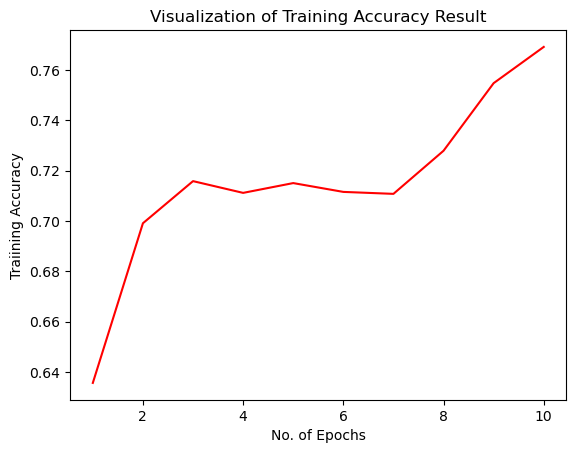

In [15]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()
     

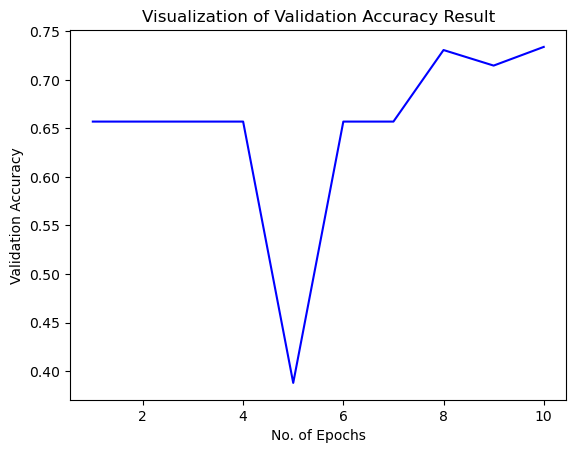

In [16]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

# Model Accuracy Testing on Test Images

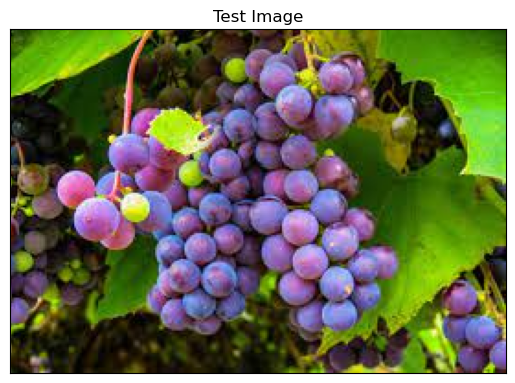

In [45]:
#Test Image Visualization
import cv2
image_path = '/Users/HP/Downloads/download (6).jpeg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [46]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 24ms/step


In [47]:
print(predictions)

[[0.48918438 0.51081556]]


In [48]:
#Single image Prediction
result_index = np.argmax(predictions)
print("It's a {}".format(test_set.class_names[result_index]))

It's a Vegetables


# Optimization on CNN Model and using Oversampling dataset

In [139]:
# Training set with rules defined
training_set1 = tf.keras.utils.image_dataset_from_directory(
    '/Users/HP/Documents/PYTHONCODES/DATASETS/FRUITS&VEGGIE/train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
    
)

Found 3609 files belonging to 2 classes.


In [146]:
# try using elu activation and also provide more convolution layers

cnn1 = tf.keras.models.Sequential()
cnn1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
     
cnn1.add(tf.keras.layers.Flatten())
     
cnn1.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn1.add(tf.keras.layers.Dropout(0.25))

cnn1.add(tf.keras.layers.Dense(units=256,activation='relu'))
    
cnn1.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting
     

#Output Layer
cnn1.add(tf.keras.layers.Dense(units=2,activation='softmax'))

In [147]:
cnn1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 62, 62, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        18464     
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        9248      
                                                      

In [148]:
# train with 40 epochs this time
training_history1 = cnn1.fit(x=training_set1,validation_data=validation_set,epochs=40)

Epoch 1/40


2023-11-26 20:36:52.273160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:36:52.538761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 40s - loss: 4.8441 - accuracy: 0.4926

2023-11-26 20:37:00.914681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 40s - loss: 3.1257 - accuracy: 0.5086

2023-11-26 20:37:07.949033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 39s - loss: 2.9683 - accuracy: 0.5141

2023-11-26 20:37:08.543492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:37:08.797532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 36s - loss: 2.7680 - accuracy: 0.5147

2023-11-26 20:37:10.441145: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 34s - loss: 2.4572 - accuracy: 0.5117

2023-11-26 20:37:12.669468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 33s - loss: 2.4141 - accuracy: 0.5122

2023-11-26 20:37:12.882191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 31s - loss: 2.1943 - accuracy: 0.5100

2023-11-26 20:37:16.215855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 30s - loss: 2.1330 - accuracy: 0.5083

2023-11-26 20:37:17.740577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 26s - loss: 1.9306 - accuracy: 0.5104

2023-11-26 20:37:20.779966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 62/113 [===============>..............] - ETA: 23s - loss: 1.8308 - accuracy: 0.5121

2023-11-26 20:37:23.080282: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/113 [===============>..............] - ETA: 22s - loss: 1.7951 - accuracy: 0.5107

2023-11-26 20:37:23.597135: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/113 [================>.............] - ETA: 21s - loss: 1.7618 - accuracy: 0.5099

2023-11-26 20:37:24.257752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 70/113 [=================>............] - ETA: 19s - loss: 1.7006 - accuracy: 0.5098

2023-11-26 20:37:26.052871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 76/113 [===================>..........] - ETA: 16s - loss: 1.6211 - accuracy: 0.5062

2023-11-26 20:37:28.187033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 77/113 [===================>..........] - ETA: 16s - loss: 1.6091 - accuracy: 0.5061

2023-11-26 20:37:28.838604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 8s - loss: 1.4433 - accuracy: 0.5066

2023-11-26 20:37:35.973675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 4s - loss: 1.3771 - accuracy: 0.5146

2023-11-26 20:37:40.106571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 1.3169 - accuracy: 0.5190

2023-11-26 20:37:43.782911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:37:45.270578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 56s 467ms/step - loss: 1.3169 - accuracy: 0.5190 - val_loss: 0.6921 - val_accuracy: 0.4904
Epoch 2/40


2023-11-26 20:37:47.837827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:37:48.125594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 44s - loss: 0.6804 - accuracy: 0.5717

2023-11-26 20:37:57.441248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 44s - loss: 0.6803 - accuracy: 0.5625

2023-11-26 20:38:04.984646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 42s - loss: 0.6804 - accuracy: 0.5615

2023-11-26 20:38:05.679508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 42s - loss: 0.6809 - accuracy: 0.5615

2023-11-26 20:38:06.044480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 40s - loss: 0.6809 - accuracy: 0.5625

2023-11-26 20:38:07.852907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 38s - loss: 0.6783 - accuracy: 0.5641

2023-11-26 20:38:10.486215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 37s - loss: 0.6791 - accuracy: 0.5610

2023-11-26 20:38:10.816217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 35s - loss: 0.6823 - accuracy: 0.5559

2023-11-26 20:38:14.816024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 35s - loss: 0.6823 - accuracy: 0.5561

2023-11-26 20:38:16.520194: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 31s - loss: 0.6799 - accuracy: 0.5641

2023-11-26 20:38:21.070431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/113 [===============>..............] - ETA: 26s - loss: 0.6790 - accuracy: 0.5620

2023-11-26 20:38:24.410171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 65/113 [================>.............] - ETA: 26s - loss: 0.6787 - accuracy: 0.5625

2023-11-26 20:38:25.042249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 68/113 [=================>............] - ETA: 24s - loss: 0.6790 - accuracy: 0.5611

2023-11-26 20:38:26.221825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 22s - loss: 0.6782 - accuracy: 0.5612

2023-11-26 20:38:28.599761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 18s - loss: 0.6790 - accuracy: 0.5617

2023-11-26 20:38:31.221495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 18s - loss: 0.6791 - accuracy: 0.5617

2023-11-26 20:38:31.958787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 10s - loss: 0.6805 - accuracy: 0.5645

2023-11-26 20:38:40.511502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.6785 - accuracy: 0.5713

2023-11-26 20:38:45.161981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.6758 - accuracy: 0.5794

2023-11-26 20:38:49.131779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:38:50.686236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 66s 555ms/step - loss: 0.6758 - accuracy: 0.5794 - val_loss: 0.6316 - val_accuracy: 0.6314
Epoch 3/40


2023-11-26 20:38:53.406345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:38:53.676123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 16/113 [===>..........................] - ETA: 45s - loss: 0.6468 - accuracy: 0.6113

2023-11-26 20:39:02.975490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/113 [======>.......................] - ETA: 45s - loss: 0.6441 - accuracy: 0.6250

2023-11-26 20:39:11.209535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 31/113 [=======>......................] - ETA: 44s - loss: 0.6435 - accuracy: 0.6240

2023-11-26 20:39:12.026478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 44s - loss: 0.6441 - accuracy: 0.6211

2023-11-26 20:39:12.400385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 42s - loss: 0.6445 - accuracy: 0.6213

2023-11-26 20:39:14.299671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 39s - loss: 0.6397 - accuracy: 0.6211

2023-11-26 20:39:16.964867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 39s - loss: 0.6394 - accuracy: 0.6212

2023-11-26 20:39:17.252465: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 36s - loss: 0.6374 - accuracy: 0.6250

2023-11-26 20:39:21.109008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 35s - loss: 0.6385 - accuracy: 0.6231

2023-11-26 20:39:22.825724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 30s - loss: 0.6387 - accuracy: 0.6261

2023-11-26 20:39:26.790660: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/113 [===============>..............] - ETA: 27s - loss: 0.6424 - accuracy: 0.6206

2023-11-26 20:39:30.854663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/113 [================>.............] - ETA: 26s - loss: 0.6432 - accuracy: 0.6198

2023-11-26 20:39:31.600529: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 68/113 [=================>............] - ETA: 24s - loss: 0.6441 - accuracy: 0.6190

2023-11-26 20:39:32.739668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/113 [==================>...........] - ETA: 22s - loss: 0.6464 - accuracy: 0.6122

2023-11-26 20:39:35.310482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/113 [===================>..........] - ETA: 19s - loss: 0.6485 - accuracy: 0.6092

2023-11-26 20:39:37.980153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 79/113 [===================>..........] - ETA: 18s - loss: 0.6495 - accuracy: 0.6072

2023-11-26 20:39:38.903877: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 10s - loss: 0.6516 - accuracy: 0.6130

2023-11-26 20:39:47.548817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.6517 - accuracy: 0.6123

2023-11-26 20:39:52.261066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.6466 - accuracy: 0.6198

2023-11-26 20:39:56.388133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:39:58.032938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 68s 572ms/step - loss: 0.6466 - accuracy: 0.6198 - val_loss: 0.7736 - val_accuracy: 0.5449
Epoch 4/40


2023-11-26 20:40:00.987570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:40:01.261141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 46s - loss: 0.6543 - accuracy: 0.6250

2023-11-26 20:40:10.817157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/113 [======>.......................] - ETA: 46s - loss: 0.6276 - accuracy: 0.6521

2023-11-26 20:40:19.388760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 31/113 [=======>......................] - ETA: 45s - loss: 0.6314 - accuracy: 0.6462

2023-11-26 20:40:20.156374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 45s - loss: 0.6334 - accuracy: 0.6426

2023-11-26 20:40:20.502180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 44s - loss: 0.6349 - accuracy: 0.6415

2023-11-26 20:40:22.672331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 42s - loss: 0.6403 - accuracy: 0.6320

2023-11-26 20:40:25.826171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 41s - loss: 0.6399 - accuracy: 0.6334

2023-11-26 20:40:26.095042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 38s - loss: 0.6402 - accuracy: 0.6297

2023-11-26 20:40:30.273478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 38s - loss: 0.6385 - accuracy: 0.6314

2023-11-26 20:40:32.116675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 33s - loss: 0.6352 - accuracy: 0.6327

2023-11-26 20:40:36.357045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 29s - loss: 0.6332 - accuracy: 0.6329

2023-11-26 20:40:39.548449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 27s - loss: 0.6315 - accuracy: 0.6346

2023-11-26 20:40:40.287127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 26s - loss: 0.6318 - accuracy: 0.6348

2023-11-26 20:40:41.176491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 23s - loss: 0.6327 - accuracy: 0.6341

2023-11-26 20:40:43.632415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 19s - loss: 0.6305 - accuracy: 0.6362

2023-11-26 20:40:46.161583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 19s - loss: 0.6310 - accuracy: 0.6357

2023-11-26 20:40:46.992637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 10s - loss: 0.6320 - accuracy: 0.6383

2023-11-26 20:40:55.711063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.6253 - accuracy: 0.6447

2023-11-26 20:41:00.880198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.6227 - accuracy: 0.6500

2023-11-26 20:41:05.478196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:41:07.224593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 69s 587ms/step - loss: 0.6227 - accuracy: 0.6500 - val_loss: 0.5533 - val_accuracy: 0.6827
Epoch 5/40


2023-11-26 20:41:10.292212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:41:10.588227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 49s - loss: 0.5661 - accuracy: 0.6930

2023-11-26 20:41:20.929158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 49s - loss: 0.5670 - accuracy: 0.6929

2023-11-26 20:41:29.159052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 47s - loss: 0.5696 - accuracy: 0.6925

2023-11-26 20:41:29.974261: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 46s - loss: 0.5671 - accuracy: 0.6953

2023-11-26 20:41:30.370697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 45s - loss: 0.5697 - accuracy: 0.6949

2023-11-26 20:41:32.426880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 42s - loss: 0.5647 - accuracy: 0.7023

2023-11-26 20:41:35.271001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 41s - loss: 0.5667 - accuracy: 0.7012

2023-11-26 20:41:35.685029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 38s - loss: 0.5674 - accuracy: 0.7061

2023-11-26 20:41:39.619121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 38s - loss: 0.5689 - accuracy: 0.7054

2023-11-26 20:41:41.404444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 32s - loss: 0.5717 - accuracy: 0.6963

2023-11-26 20:41:45.710156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/113 [===============>..............] - ETA: 28s - loss: 0.5721 - accuracy: 0.6934

2023-11-26 20:41:49.043606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 65/113 [================>.............] - ETA: 27s - loss: 0.5729 - accuracy: 0.6923

2023-11-26 20:41:49.764712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 68/113 [=================>............] - ETA: 25s - loss: 0.5731 - accuracy: 0.6903

2023-11-26 20:41:50.858001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 23s - loss: 0.5747 - accuracy: 0.6888

2023-11-26 20:41:53.613929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 19s - loss: 0.5725 - accuracy: 0.6907

2023-11-26 20:41:56.177281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 19s - loss: 0.5787 - accuracy: 0.6891

2023-11-26 20:41:56.996215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 10s - loss: 0.5741 - accuracy: 0.6958

2023-11-26 20:42:05.581467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.5704 - accuracy: 0.6984

2023-11-26 20:42:10.545348: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.5625 - accuracy: 0.7060

2023-11-26 20:42:14.656723: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:42:16.241294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 69s 583ms/step - loss: 0.5625 - accuracy: 0.7060 - val_loss: 0.5094 - val_accuracy: 0.7500
Epoch 6/40


2023-11-26 20:42:19.170133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:42:19.451281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 51s - loss: 0.5535 - accuracy: 0.7077

2023-11-26 20:42:29.954940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 50s - loss: 0.5452 - accuracy: 0.6994

2023-11-26 20:42:38.553672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 48s - loss: 0.5434 - accuracy: 0.7026

2023-11-26 20:42:39.468265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 48s - loss: 0.5445 - accuracy: 0.6992

2023-11-26 20:42:40.032389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 46s - loss: 0.5430 - accuracy: 0.7013

2023-11-26 20:42:41.962273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 43s - loss: 0.5311 - accuracy: 0.7125

2023-11-26 20:42:44.809833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 43s - loss: 0.5313 - accuracy: 0.7149

2023-11-26 20:42:45.076807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 39s - loss: 0.5314 - accuracy: 0.7168

2023-11-26 20:42:49.216689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 39s - loss: 0.5286 - accuracy: 0.7175

2023-11-26 20:42:50.965173: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 33s - loss: 0.5287 - accuracy: 0.7144

2023-11-26 20:42:54.810197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 29s - loss: 0.5282 - accuracy: 0.7128

2023-11-26 20:42:58.176478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 28s - loss: 0.5250 - accuracy: 0.7159

2023-11-26 20:42:58.976893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 26s - loss: 0.5240 - accuracy: 0.7169

2023-11-26 20:42:59.828254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 23s - loss: 0.5239 - accuracy: 0.7205

2023-11-26 20:43:02.613656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 20s - loss: 0.5239 - accuracy: 0.7228

2023-11-26 20:43:05.546467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 19s - loss: 0.5237 - accuracy: 0.7215

2023-11-26 20:43:06.373602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 11s - loss: 0.5202 - accuracy: 0.7277

2023-11-26 20:43:15.706831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.5117 - accuracy: 0.7370

2023-11-26 20:43:21.150790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.5056 - accuracy: 0.7409

2023-11-26 20:43:25.434346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:43:27.086218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 71s 601ms/step - loss: 0.5056 - accuracy: 0.7409 - val_loss: 0.4139 - val_accuracy: 0.7981
Epoch 7/40


2023-11-26 20:43:29.978736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:43:30.264099: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 49s - loss: 0.4798 - accuracy: 0.7574

2023-11-26 20:43:40.309823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 49s - loss: 0.4616 - accuracy: 0.7683

2023-11-26 20:43:49.034159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 47s - loss: 0.4637 - accuracy: 0.7671

2023-11-26 20:43:50.030296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:43:50.493114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 46s - loss: 0.4651 - accuracy: 0.7656

2023-11-26 20:43:52.704239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 43s - loss: 0.4586 - accuracy: 0.7711

2023-11-26 20:43:55.810104: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 43s - loss: 0.4557 - accuracy: 0.7736

2023-11-26 20:43:56.080938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 40s - loss: 0.4720 - accuracy: 0.7660

2023-11-26 20:44:00.900173: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 40s - loss: 0.4760 - accuracy: 0.7621

2023-11-26 20:44:03.048486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 35s - loss: 0.4791 - accuracy: 0.7643

2023-11-26 20:44:07.385271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 30s - loss: 0.4824 - accuracy: 0.7624

2023-11-26 20:44:10.609973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 29s - loss: 0.4802 - accuracy: 0.7639

2023-11-26 20:44:11.289889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 27s - loss: 0.4781 - accuracy: 0.7645

2023-11-26 20:44:12.238385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 24s - loss: 0.4765 - accuracy: 0.7656

2023-11-26 20:44:14.828685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 20s - loss: 0.4780 - accuracy: 0.7640

2023-11-26 20:44:17.575814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 20s - loss: 0.4784 - accuracy: 0.7638

2023-11-26 20:44:18.401477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/113 [========================>.....] - ETA: 10s - loss: 0.4610 - accuracy: 0.7740

2023-11-26 20:44:27.452283: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.4525 - accuracy: 0.7797

2023-11-26 20:44:32.999183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.4423 - accuracy: 0.7864

2023-11-26 20:44:37.124004: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:44:38.781294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 72s 608ms/step - loss: 0.4423 - accuracy: 0.7864 - val_loss: 0.3420 - val_accuracy: 0.8205
Epoch 8/40


2023-11-26 20:44:41.644431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:44:41.926590: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 52s - loss: 0.3675 - accuracy: 0.8180

2023-11-26 20:44:52.543308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 51s - loss: 0.3794 - accuracy: 0.8136

2023-11-26 20:45:01.081580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 49s - loss: 0.3826 - accuracy: 0.8085

2023-11-26 20:45:01.892023: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:45:02.209381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 46s - loss: 0.3921 - accuracy: 0.8051

2023-11-26 20:45:04.249227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 43s - loss: 0.3975 - accuracy: 0.8062

2023-11-26 20:45:07.190274: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 42s - loss: 0.3951 - accuracy: 0.8072

2023-11-26 20:45:07.473448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 40s - loss: 0.3951 - accuracy: 0.8072

2023-11-26 20:45:12.478592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 40s - loss: 0.3948 - accuracy: 0.8080

2023-11-26 20:45:14.432572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 34s - loss: 0.3976 - accuracy: 0.8054

2023-11-26 20:45:18.925270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 30s - loss: 0.3966 - accuracy: 0.8070

2023-11-26 20:45:22.480980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/113 [================>.............] - ETA: 28s - loss: 0.3934 - accuracy: 0.8092

2023-11-26 20:45:23.372993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 67/113 [================>.............] - ETA: 27s - loss: 0.3938 - accuracy: 0.8097

2023-11-26 20:45:24.226492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 24s - loss: 0.3930 - accuracy: 0.8082

2023-11-26 20:45:26.521732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 20s - loss: 0.3868 - accuracy: 0.8117

2023-11-26 20:45:29.223245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 20s - loss: 0.3872 - accuracy: 0.8113

2023-11-26 20:45:30.024598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 11s - loss: 0.3874 - accuracy: 0.8059

2023-11-26 20:45:38.890987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.3878 - accuracy: 0.8076

2023-11-26 20:45:44.457928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.3836 - accuracy: 0.8124

2023-11-26 20:45:48.831022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:45:50.469533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 72s 610ms/step - loss: 0.3836 - accuracy: 0.8124 - val_loss: 0.2836 - val_accuracy: 0.8686
Epoch 9/40


2023-11-26 20:45:53.563402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:45:53.860243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 49s - loss: 0.3618 - accuracy: 0.8474

2023-11-26 20:46:04.088731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 50s - loss: 0.3447 - accuracy: 0.8405

2023-11-26 20:46:12.755017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 47s - loss: 0.3434 - accuracy: 0.8407

2023-11-26 20:46:13.530478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 47s - loss: 0.3385 - accuracy: 0.8428

2023-11-26 20:46:14.040585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 45s - loss: 0.3390 - accuracy: 0.8438

2023-11-26 20:46:16.026915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 43s - loss: 0.3400 - accuracy: 0.8406

2023-11-26 20:46:19.102631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 42s - loss: 0.3383 - accuracy: 0.8415

2023-11-26 20:46:19.527394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 39s - loss: 0.3444 - accuracy: 0.8378

2023-11-26 20:46:23.789438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 39s - loss: 0.3507 - accuracy: 0.8329

2023-11-26 20:46:25.648262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 33s - loss: 0.3643 - accuracy: 0.8262

2023-11-26 20:46:29.624625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/113 [===============>..............] - ETA: 28s - loss: 0.3654 - accuracy: 0.8267

2023-11-26 20:46:32.873976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/113 [================>.............] - ETA: 27s - loss: 0.3624 - accuracy: 0.8286

2023-11-26 20:46:33.633888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 68/113 [=================>............] - ETA: 26s - loss: 0.3627 - accuracy: 0.8286

2023-11-26 20:46:34.521498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 23s - loss: 0.3647 - accuracy: 0.8273

2023-11-26 20:46:36.832578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 19s - loss: 0.3629 - accuracy: 0.8277

2023-11-26 20:46:39.502915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 19s - loss: 0.3632 - accuracy: 0.8275

2023-11-26 20:46:40.409193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 10s - loss: 0.3571 - accuracy: 0.8328

2023-11-26 20:46:49.551877: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.3523 - accuracy: 0.8374

2023-11-26 20:46:54.805776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.3459 - accuracy: 0.8421

2023-11-26 20:46:59.425953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:47:01.100527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 70s 598ms/step - loss: 0.3459 - accuracy: 0.8421 - val_loss: 0.3017 - val_accuracy: 0.8462
Epoch 10/40


2023-11-26 20:47:04.060448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:47:04.351378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 52s - loss: 0.2941 - accuracy: 0.8750

2023-11-26 20:47:15.163662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 51s - loss: 0.2860 - accuracy: 0.8836

2023-11-26 20:47:23.743825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 49s - loss: 0.2833 - accuracy: 0.8831

2023-11-26 20:47:24.530398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 48s - loss: 0.2845 - accuracy: 0.8809

2023-11-26 20:47:24.908125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 46s - loss: 0.2821 - accuracy: 0.8796

2023-11-26 20:47:26.825038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 44s - loss: 0.2821 - accuracy: 0.8789

2023-11-26 20:47:30.063095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 43s - loss: 0.2828 - accuracy: 0.8765

2023-11-26 20:47:30.356183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 40s - loss: 0.2819 - accuracy: 0.8803

2023-11-26 20:47:34.688831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 39s - loss: 0.2813 - accuracy: 0.8788

2023-11-26 20:47:36.512571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 34s - loss: 0.2832 - accuracy: 0.8766

2023-11-26 20:47:40.863569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 30s - loss: 0.2902 - accuracy: 0.8725

2023-11-26 20:47:44.534373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 29s - loss: 0.2959 - accuracy: 0.8702

2023-11-26 20:47:45.452239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 27s - loss: 0.2953 - accuracy: 0.8708

2023-11-26 20:47:46.408342: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/113 [==================>...........] - ETA: 23s - loss: 0.2905 - accuracy: 0.8733

2023-11-26 20:47:49.051020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 20s - loss: 0.2883 - accuracy: 0.8746

2023-11-26 20:47:51.781185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 20s - loss: 0.2896 - accuracy: 0.8738

2023-11-26 20:47:52.766892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/113 [========================>.....] - ETA: 10s - loss: 0.2858 - accuracy: 0.8757

2023-11-26 20:48:01.856559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.2805 - accuracy: 0.8765

2023-11-26 20:48:07.107691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.2758 - accuracy: 0.8792

2023-11-26 20:48:11.236567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:48:12.909469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 72s 608ms/step - loss: 0.2758 - accuracy: 0.8792 - val_loss: 0.3707 - val_accuracy: 0.8462
Epoch 11/40


2023-11-26 20:48:15.728015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:48:16.014463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 50s - loss: 0.3045 - accuracy: 0.8750

2023-11-26 20:48:26.467338: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 52s - loss: 0.2981 - accuracy: 0.8750

2023-11-26 20:48:35.532061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 49s - loss: 0.2955 - accuracy: 0.8760

2023-11-26 20:48:36.345030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 49s - loss: 0.2972 - accuracy: 0.8740

2023-11-26 20:48:36.705579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 47s - loss: 0.2928 - accuracy: 0.8750

2023-11-26 20:48:38.726236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 44s - loss: 0.2863 - accuracy: 0.8750

2023-11-26 20:48:41.714046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 43s - loss: 0.2872 - accuracy: 0.8727

2023-11-26 20:48:42.019329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 40s - loss: 0.2961 - accuracy: 0.8684

2023-11-26 20:48:46.187477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 39s - loss: 0.2981 - accuracy: 0.8648

2023-11-26 20:48:48.064915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 34s - loss: 0.2961 - accuracy: 0.8668

2023-11-26 20:48:52.038311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 29s - loss: 0.2927 - accuracy: 0.8656

2023-11-26 20:48:55.176738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 28s - loss: 0.2886 - accuracy: 0.8678

2023-11-26 20:48:55.916617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 27s - loss: 0.2872 - accuracy: 0.8694

2023-11-26 20:48:56.913742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 23s - loss: 0.2870 - accuracy: 0.8668

2023-11-26 20:48:59.538002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 20s - loss: 0.2887 - accuracy: 0.8666

2023-11-26 20:49:02.121979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 19s - loss: 0.2875 - accuracy: 0.8679

2023-11-26 20:49:03.368760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 11s - loss: 0.2812 - accuracy: 0.8723

2023-11-26 20:49:12.527236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.2832 - accuracy: 0.8735

2023-11-26 20:49:17.829863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.2849 - accuracy: 0.8748

2023-11-26 20:49:22.556259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:49:24.292716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 72s 607ms/step - loss: 0.2849 - accuracy: 0.8748 - val_loss: 0.2561 - val_accuracy: 0.8942
Epoch 12/40


2023-11-26 20:49:27.271847: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:49:27.562585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 51s - loss: 0.2365 - accuracy: 0.9007

2023-11-26 20:49:38.157607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 50s - loss: 0.2531 - accuracy: 0.8901

2023-11-26 20:49:46.544595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 48s - loss: 0.2499 - accuracy: 0.8911

2023-11-26 20:49:47.494145: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 48s - loss: 0.2496 - accuracy: 0.8906

2023-11-26 20:49:47.869193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 46s - loss: 0.2454 - accuracy: 0.8925

2023-11-26 20:49:49.907637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 43s - loss: 0.2350 - accuracy: 0.8984

2023-11-26 20:49:53.206893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 43s - loss: 0.2367 - accuracy: 0.8971

2023-11-26 20:49:53.502986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 40s - loss: 0.2333 - accuracy: 0.8989

2023-11-26 20:49:58.065416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 40s - loss: 0.2332 - accuracy: 0.8986

2023-11-26 20:49:59.906678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 34s - loss: 0.2444 - accuracy: 0.8975

2023-11-26 20:50:04.080378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 30s - loss: 0.2477 - accuracy: 0.8968

2023-11-26 20:50:07.506917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/113 [================>.............] - ETA: 28s - loss: 0.2490 - accuracy: 0.8949

2023-11-26 20:50:08.395356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 67/113 [================>.............] - ETA: 27s - loss: 0.2493 - accuracy: 0.8946

2023-11-26 20:50:09.263885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 24s - loss: 0.2463 - accuracy: 0.8963

2023-11-26 20:50:11.594070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 20s - loss: 0.2403 - accuracy: 0.8986

2023-11-26 20:50:14.216435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 19s - loss: 0.2405 - accuracy: 0.8991

2023-11-26 20:50:15.037268: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 11s - loss: 0.2418 - accuracy: 0.8956

2023-11-26 20:50:23.864261: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.2348 - accuracy: 0.8993

2023-11-26 20:50:29.365531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.2298 - accuracy: 0.9008

2023-11-26 20:50:33.631873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:50:35.342700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 71s 601ms/step - loss: 0.2298 - accuracy: 0.9008 - val_loss: 0.2187 - val_accuracy: 0.8974
Epoch 13/40


2023-11-26 20:50:38.223160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:50:38.512518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 48s - loss: 0.2311 - accuracy: 0.9062

2023-11-26 20:50:48.755095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/113 [======>.......................] - ETA: 48s - loss: 0.2150 - accuracy: 0.9052

2023-11-26 20:50:57.326950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 31/113 [=======>......................] - ETA: 47s - loss: 0.2131 - accuracy: 0.9062

2023-11-26 20:50:58.105659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 47s - loss: 0.2132 - accuracy: 0.9043

2023-11-26 20:50:58.467403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 44s - loss: 0.2171 - accuracy: 0.9017

2023-11-26 20:51:00.436543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 42s - loss: 0.2044 - accuracy: 0.9094

2023-11-26 20:51:03.592993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 42s - loss: 0.2053 - accuracy: 0.9101

2023-11-26 20:51:03.996600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 39s - loss: 0.2125 - accuracy: 0.9082

2023-11-26 20:51:08.445793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 39s - loss: 0.2145 - accuracy: 0.9082

2023-11-26 20:51:10.310290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 58/113 [==============>...............] - ETA: 33s - loss: 0.2142 - accuracy: 0.9057

2023-11-26 20:51:14.819214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/113 [===============>..............] - ETA: 29s - loss: 0.2128 - accuracy: 0.9048

2023-11-26 20:51:18.209190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 65/113 [================>.............] - ETA: 28s - loss: 0.2111 - accuracy: 0.9058

2023-11-26 20:51:18.996150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 27s - loss: 0.2138 - accuracy: 0.9049

2023-11-26 20:51:20.007435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 23s - loss: 0.2079 - accuracy: 0.9076

2023-11-26 20:51:22.320665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 20s - loss: 0.2060 - accuracy: 0.9087

2023-11-26 20:51:24.965325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 19s - loss: 0.2061 - accuracy: 0.9086

2023-11-26 20:51:25.849536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 10s - loss: 0.2001 - accuracy: 0.9116

2023-11-26 20:51:34.453679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.1953 - accuracy: 0.9138

2023-11-26 20:51:39.458250: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.1925 - accuracy: 0.9155

2023-11-26 20:51:43.771882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:51:45.453535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 70s 593ms/step - loss: 0.1925 - accuracy: 0.9155 - val_loss: 0.1996 - val_accuracy: 0.9199
Epoch 14/40


2023-11-26 20:51:48.266910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:51:48.557827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 52s - loss: 0.2160 - accuracy: 0.9136

2023-11-26 20:51:59.540470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 53s - loss: 0.1853 - accuracy: 0.9235

2023-11-26 20:52:08.390037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 50s - loss: 0.1849 - accuracy: 0.9224

2023-11-26 20:52:09.242251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 50s - loss: 0.1831 - accuracy: 0.9229

2023-11-26 20:52:09.579774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 47s - loss: 0.1815 - accuracy: 0.9228

2023-11-26 20:52:11.561919: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 44s - loss: 0.1793 - accuracy: 0.9227

2023-11-26 20:52:14.440280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 43s - loss: 0.1769 - accuracy: 0.9230

2023-11-26 20:52:14.805533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 40s - loss: 0.1770 - accuracy: 0.9222

2023-11-26 20:52:19.096300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 40s - loss: 0.1774 - accuracy: 0.9228

2023-11-26 20:52:20.904392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 34s - loss: 0.1767 - accuracy: 0.9232

2023-11-26 20:52:24.860699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 29s - loss: 0.1770 - accuracy: 0.9226

2023-11-26 20:52:27.912050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 28s - loss: 0.1766 - accuracy: 0.9231

2023-11-26 20:52:28.569133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 27s - loss: 0.1806 - accuracy: 0.9221

2023-11-26 20:52:29.382635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 23s - loss: 0.1882 - accuracy: 0.9201

2023-11-26 20:52:31.822776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 19s - loss: 0.1878 - accuracy: 0.9223

2023-11-26 20:52:34.299389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 19s - loss: 0.1872 - accuracy: 0.9217

2023-11-26 20:52:35.093814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 10s - loss: 0.1893 - accuracy: 0.9189

2023-11-26 20:52:43.021970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.1836 - accuracy: 0.9202

2023-11-26 20:52:47.823970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.1783 - accuracy: 0.9221

2023-11-26 20:52:51.754343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:52:53.376461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 68s 574ms/step - loss: 0.1783 - accuracy: 0.9221 - val_loss: 0.1938 - val_accuracy: 0.9199
Epoch 15/40


2023-11-26 20:52:56.140722: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:52:56.418694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 46s - loss: 0.1645 - accuracy: 0.9301

2023-11-26 20:53:06.244326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/113 [======>.......................] - ETA: 45s - loss: 0.1624 - accuracy: 0.9281

2023-11-26 20:53:14.183645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 31/113 [=======>......................] - ETA: 44s - loss: 0.1614 - accuracy: 0.9294

2023-11-26 20:53:14.935588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 44s - loss: 0.1617 - accuracy: 0.9287

2023-11-26 20:53:15.312186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 42s - loss: 0.1616 - accuracy: 0.9265

2023-11-26 20:53:17.149957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 40s - loss: 0.1574 - accuracy: 0.9289

2023-11-26 20:53:19.967420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 39s - loss: 0.1592 - accuracy: 0.9284

2023-11-26 20:53:20.290761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 37s - loss: 0.1580 - accuracy: 0.9295

2023-11-26 20:53:24.352777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 36s - loss: 0.1577 - accuracy: 0.9305

2023-11-26 20:53:26.061132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 31s - loss: 0.1542 - accuracy: 0.9326

2023-11-26 20:53:29.803218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 27s - loss: 0.1508 - accuracy: 0.9340

2023-11-26 20:53:32.734430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 26s - loss: 0.1512 - accuracy: 0.9341

2023-11-26 20:53:33.377942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 25s - loss: 0.1517 - accuracy: 0.9342

2023-11-26 20:53:34.216635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 22s - loss: 0.1475 - accuracy: 0.9366

2023-11-26 20:53:36.610487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 18s - loss: 0.1463 - accuracy: 0.9371

2023-11-26 20:53:39.016477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 18s - loss: 0.1467 - accuracy: 0.9363

2023-11-26 20:53:39.806733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 10s - loss: 0.1484 - accuracy: 0.9378

2023-11-26 20:53:47.841172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.1454 - accuracy: 0.9393

2023-11-26 20:53:52.506107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.1502 - accuracy: 0.9379

2023-11-26 20:53:56.428637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:53:58.063636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 65s 547ms/step - loss: 0.1502 - accuracy: 0.9379 - val_loss: 0.2500 - val_accuracy: 0.9103
Epoch 16/40


2023-11-26 20:54:00.847409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:54:01.142230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 45s - loss: 0.1703 - accuracy: 0.9375

2023-11-26 20:54:10.697607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/113 [======>.......................] - ETA: 44s - loss: 0.1846 - accuracy: 0.9229

2023-11-26 20:54:18.582779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 31/113 [=======>......................] - ETA: 44s - loss: 0.1885 - accuracy: 0.9234

2023-11-26 20:54:19.320688: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 43s - loss: 0.1893 - accuracy: 0.9229

2023-11-26 20:54:19.676498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 41s - loss: 0.1864 - accuracy: 0.9237

2023-11-26 20:54:21.500253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 39s - loss: 0.2015 - accuracy: 0.9211

2023-11-26 20:54:24.317398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 38s - loss: 0.2084 - accuracy: 0.9184

2023-11-26 20:54:24.596141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 36s - loss: 0.2378 - accuracy: 0.9003

2023-11-26 20:54:28.471183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 35s - loss: 0.2388 - accuracy: 0.9005

2023-11-26 20:54:30.144291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 30s - loss: 0.2382 - accuracy: 0.8969

2023-11-26 20:54:33.768527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/113 [===============>..............] - ETA: 26s - loss: 0.2387 - accuracy: 0.8940

2023-11-26 20:54:36.823254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 65/113 [================>.............] - ETA: 25s - loss: 0.2372 - accuracy: 0.8942

2023-11-26 20:54:37.514073: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 24s - loss: 0.2344 - accuracy: 0.8965

2023-11-26 20:54:38.366256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 21s - loss: 0.2321 - accuracy: 0.8967

2023-11-26 20:54:40.722820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 18s - loss: 0.2274 - accuracy: 0.8994

2023-11-26 20:54:43.138379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 17s - loss: 0.2261 - accuracy: 0.8999

2023-11-26 20:54:43.923715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 9s - loss: 0.2203 - accuracy: 0.9006 

2023-11-26 20:54:51.871683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.2103 - accuracy: 0.9056

2023-11-26 20:54:56.548360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.2064 - accuracy: 0.9072

2023-11-26 20:55:00.517521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:55:02.164434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 64s 541ms/step - loss: 0.2064 - accuracy: 0.9072 - val_loss: 0.1261 - val_accuracy: 0.9327
Epoch 17/40


2023-11-26 20:55:04.924399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:55:05.202456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 45s - loss: 0.1050 - accuracy: 0.9540

2023-11-26 20:55:14.753628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 45s - loss: 0.1225 - accuracy: 0.9494

2023-11-26 20:55:22.543898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 43s - loss: 0.1240 - accuracy: 0.9476

2023-11-26 20:55:23.294553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 43s - loss: 0.1237 - accuracy: 0.9463

2023-11-26 20:55:23.621506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 41s - loss: 0.1257 - accuracy: 0.9439

2023-11-26 20:55:25.492977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 39s - loss: 0.1231 - accuracy: 0.9438

2023-11-26 20:55:28.328064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 38s - loss: 0.1221 - accuracy: 0.9444

2023-11-26 20:55:28.607834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 36s - loss: 0.1217 - accuracy: 0.9448

2023-11-26 20:55:32.499506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 35s - loss: 0.1255 - accuracy: 0.9426

2023-11-26 20:55:34.151466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 30s - loss: 0.1308 - accuracy: 0.9402

2023-11-26 20:55:37.916794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 27s - loss: 0.1381 - accuracy: 0.9415

2023-11-26 20:55:40.953808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 25s - loss: 0.1354 - accuracy: 0.9433

2023-11-26 20:55:41.652835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 24s - loss: 0.1338 - accuracy: 0.9440

2023-11-26 20:55:42.492456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 21s - loss: 0.1319 - accuracy: 0.9444

2023-11-26 20:55:44.866647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 18s - loss: 0.1280 - accuracy: 0.9455

2023-11-26 20:55:47.263818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 17s - loss: 0.1274 - accuracy: 0.9462

2023-11-26 20:55:48.023747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 9s - loss: 0.1280 - accuracy: 0.9468 

2023-11-26 20:55:56.037777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.1375 - accuracy: 0.9448

2023-11-26 20:56:00.854379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.1380 - accuracy: 0.9449

2023-11-26 20:56:04.769076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:56:06.393431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 64s 543ms/step - loss: 0.1380 - accuracy: 0.9449 - val_loss: 0.1610 - val_accuracy: 0.9295
Epoch 18/40


2023-11-26 20:56:09.144799: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:56:09.421523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 46s - loss: 0.1456 - accuracy: 0.9467

2023-11-26 20:56:18.917614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 45s - loss: 0.1396 - accuracy: 0.9472

2023-11-26 20:56:26.782566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 43s - loss: 0.1461 - accuracy: 0.9446

2023-11-26 20:56:27.551295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 43s - loss: 0.1447 - accuracy: 0.9453

2023-11-26 20:56:27.891969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 41s - loss: 0.1485 - accuracy: 0.9403

2023-11-26 20:56:29.742087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 39s - loss: 0.1445 - accuracy: 0.9422

2023-11-26 20:56:32.565499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 38s - loss: 0.1432 - accuracy: 0.9436

2023-11-26 20:56:32.850127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 36s - loss: 0.1430 - accuracy: 0.9435

2023-11-26 20:56:36.773342: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 35s - loss: 0.1434 - accuracy: 0.9420

2023-11-26 20:56:38.504137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 30s - loss: 0.1345 - accuracy: 0.9463

2023-11-26 20:56:42.276614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 27s - loss: 0.1322 - accuracy: 0.9459

2023-11-26 20:56:45.228800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 25s - loss: 0.1314 - accuracy: 0.9457

2023-11-26 20:56:45.861742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 24s - loss: 0.1291 - accuracy: 0.9464

2023-11-26 20:56:46.668905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 21s - loss: 0.1266 - accuracy: 0.9470

2023-11-26 20:56:49.055054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 18s - loss: 0.1259 - accuracy: 0.9467

2023-11-26 20:56:51.750490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 17s - loss: 0.1245 - accuracy: 0.9474

2023-11-26 20:56:52.549179: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 10s - loss: 0.1190 - accuracy: 0.9511

2023-11-26 20:57:01.297399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.1159 - accuracy: 0.9527

2023-11-26 20:57:06.442674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.1158 - accuracy: 0.9534

2023-11-26 20:57:11.191689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:57:12.983601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 67s 565ms/step - loss: 0.1158 - accuracy: 0.9534 - val_loss: 0.1030 - val_accuracy: 0.9455
Epoch 19/40


2023-11-26 20:57:15.946602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:57:16.225929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 51s - loss: 0.1182 - accuracy: 0.9430

2023-11-26 20:57:27.012803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/113 [======>.......................] - ETA: 51s - loss: 0.1445 - accuracy: 0.9385

2023-11-26 20:57:36.043964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 31/113 [=======>......................] - ETA: 50s - loss: 0.1413 - accuracy: 0.9395

2023-11-26 20:57:36.877723: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 49s - loss: 0.1374 - accuracy: 0.9414

2023-11-26 20:57:37.398227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 47s - loss: 0.1352 - accuracy: 0.9403

2023-11-26 20:57:39.370840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 45s - loss: 0.1249 - accuracy: 0.9445

2023-11-26 20:57:42.600229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 44s - loss: 0.1264 - accuracy: 0.9444

2023-11-26 20:57:42.952420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 41s - loss: 0.1207 - accuracy: 0.9468

2023-11-26 20:57:47.272849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 40s - loss: 0.1252 - accuracy: 0.9458

2023-11-26 20:57:49.087011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 35s - loss: 0.1226 - accuracy: 0.9468

2023-11-26 20:57:53.685131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 30s - loss: 0.1204 - accuracy: 0.9479

2023-11-26 20:57:56.857983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 29s - loss: 0.1187 - accuracy: 0.9486

2023-11-26 20:57:57.588296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 28s - loss: 0.1193 - accuracy: 0.9487

2023-11-26 20:57:58.489006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 24s - loss: 0.1167 - accuracy: 0.9497

2023-11-26 20:58:00.887521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 20s - loss: 0.1312 - accuracy: 0.9487

2023-11-26 20:58:03.916942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 20s - loss: 0.1304 - accuracy: 0.9490

2023-11-26 20:58:04.846326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/113 [========================>.....] - ETA: 10s - loss: 0.1327 - accuracy: 0.9480

2023-11-26 20:58:14.382932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.1319 - accuracy: 0.9484

2023-11-26 20:58:19.696067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.1309 - accuracy: 0.9493

2023-11-26 20:58:24.521589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:58:26.239175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 73s 621ms/step - loss: 0.1309 - accuracy: 0.9493 - val_loss: 0.1729 - val_accuracy: 0.9327
Epoch 20/40


2023-11-26 20:58:29.190681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:58:29.492329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 52s - loss: 0.1046 - accuracy: 0.9596

2023-11-26 20:58:40.308286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/113 [======>.......................] - ETA: 50s - loss: 0.1011 - accuracy: 0.9594

2023-11-26 20:58:48.855952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 31/113 [=======>......................] - ETA: 49s - loss: 0.1011 - accuracy: 0.9597

2023-11-26 20:58:49.648715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 48s - loss: 0.0998 - accuracy: 0.9609

2023-11-26 20:58:50.005235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 46s - loss: 0.0977 - accuracy: 0.9614

2023-11-26 20:58:51.925870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 43s - loss: 0.0927 - accuracy: 0.9633

2023-11-26 20:58:54.900570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 42s - loss: 0.0907 - accuracy: 0.9642

2023-11-26 20:58:55.334205: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 40s - loss: 0.0938 - accuracy: 0.9608

2023-11-26 20:58:59.550617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 39s - loss: 0.0958 - accuracy: 0.9605

2023-11-26 20:59:01.377385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 34s - loss: 0.0993 - accuracy: 0.9589

2023-11-26 20:59:05.888903: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 30s - loss: 0.1004 - accuracy: 0.9578

2023-11-26 20:59:09.410163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 29s - loss: 0.1028 - accuracy: 0.9572

2023-11-26 20:59:10.303541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 27s - loss: 0.1031 - accuracy: 0.9571

2023-11-26 20:59:11.313787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 24s - loss: 0.1077 - accuracy: 0.9570

2023-11-26 20:59:13.952345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/113 [===================>..........] - ETA: 21s - loss: 0.1125 - accuracy: 0.9545

2023-11-26 20:59:16.581107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 79/113 [===================>..........] - ETA: 19s - loss: 0.1122 - accuracy: 0.9549

2023-11-26 20:59:17.449012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 11s - loss: 0.1042 - accuracy: 0.9581

2023-11-26 20:59:26.328570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.1035 - accuracy: 0.9596

2023-11-26 20:59:31.406252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.1037 - accuracy: 0.9601

2023-11-26 20:59:35.585077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:59:37.305923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 71s 602ms/step - loss: 0.1037 - accuracy: 0.9601 - val_loss: 0.2548 - val_accuracy: 0.9199
Epoch 21/40


2023-11-26 20:59:40.236354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 20:59:40.526411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 55s - loss: 0.1592 - accuracy: 0.9449

2023-11-26 20:59:52.125063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 55s - loss: 0.1505 - accuracy: 0.9450

2023-11-26 21:00:01.275703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 52s - loss: 0.1529 - accuracy: 0.9446

2023-11-26 21:00:02.208869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 52s - loss: 0.1510 - accuracy: 0.9453

2023-11-26 21:00:02.674789: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 50s - loss: 0.1475 - accuracy: 0.9458

2023-11-26 21:00:04.747573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 46s - loss: 0.1362 - accuracy: 0.9492

2023-11-26 21:00:07.724190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 45s - loss: 0.1343 - accuracy: 0.9497

2023-11-26 21:00:08.016995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 41s - loss: 0.1296 - accuracy: 0.9515

2023-11-26 21:00:12.173544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 41s - loss: 0.1279 - accuracy: 0.9509

2023-11-26 21:00:14.105691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 35s - loss: 0.1245 - accuracy: 0.9512

2023-11-26 21:00:18.560482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 31s - loss: 0.1205 - accuracy: 0.9514

2023-11-26 21:00:21.899396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 29s - loss: 0.1198 - accuracy: 0.9510

2023-11-26 21:00:22.580869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 28s - loss: 0.1179 - accuracy: 0.9515

2023-11-26 21:00:23.704816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/113 [==================>...........] - ETA: 24s - loss: 0.1180 - accuracy: 0.9516

2023-11-26 21:00:26.464446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/113 [===================>..........] - ETA: 21s - loss: 0.1158 - accuracy: 0.9525

2023-11-26 21:00:29.148322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 79/113 [===================>..........] - ETA: 20s - loss: 0.1142 - accuracy: 0.9533

2023-11-26 21:00:29.976275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 11s - loss: 0.1111 - accuracy: 0.9545

2023-11-26 21:00:39.267269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 6s - loss: 0.1084 - accuracy: 0.9548

2023-11-26 21:00:44.257653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.1065 - accuracy: 0.9571

2023-11-26 21:00:48.627399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:00:50.350641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 73s 618ms/step - loss: 0.1065 - accuracy: 0.9571 - val_loss: 0.2153 - val_accuracy: 0.9295
Epoch 22/40


2023-11-26 21:00:53.216907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:00:53.506138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 47s - loss: 0.1263 - accuracy: 0.9577

2023-11-26 21:01:03.612749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 48s - loss: 0.1160 - accuracy: 0.9558

2023-11-26 21:01:11.910094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 46s - loss: 0.1115 - accuracy: 0.9577

2023-11-26 21:01:12.703346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 46s - loss: 0.1115 - accuracy: 0.9561

2023-11-26 21:01:13.057791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 44s - loss: 0.1080 - accuracy: 0.9577

2023-11-26 21:01:14.954463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 42s - loss: 0.1045 - accuracy: 0.9570

2023-11-26 21:01:18.090742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 41s - loss: 0.1023 - accuracy: 0.9581

2023-11-26 21:01:18.452041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 38s - loss: 0.0992 - accuracy: 0.9588

2023-11-26 21:01:22.732872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 38s - loss: 0.0983 - accuracy: 0.9585

2023-11-26 21:01:24.465604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 32s - loss: 0.0971 - accuracy: 0.9589

2023-11-26 21:01:28.406979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 29s - loss: 0.0952 - accuracy: 0.9588

2023-11-26 21:01:31.887591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 27s - loss: 0.0939 - accuracy: 0.9596

2023-11-26 21:01:32.684921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 26s - loss: 0.0930 - accuracy: 0.9604

2023-11-26 21:01:33.588188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 23s - loss: 0.0909 - accuracy: 0.9614

2023-11-26 21:01:36.221005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 19s - loss: 0.0893 - accuracy: 0.9619

2023-11-26 21:01:38.927117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 19s - loss: 0.0886 - accuracy: 0.9624

2023-11-26 21:01:39.777105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 10s - loss: 0.0839 - accuracy: 0.9641

2023-11-26 21:01:48.581941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.0813 - accuracy: 0.9648

2023-11-26 21:01:53.641213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.0783 - accuracy: 0.9662

2023-11-26 21:01:57.756757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:01:59.503947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 69s 587ms/step - loss: 0.0783 - accuracy: 0.9662 - val_loss: 0.1050 - val_accuracy: 0.9744
Epoch 23/40


2023-11-26 21:02:02.510305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:02:02.802812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 50s - loss: 0.0393 - accuracy: 0.9798

2023-11-26 21:02:13.043229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 49s - loss: 0.0693 - accuracy: 0.9763

2023-11-26 21:02:21.630745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 47s - loss: 0.0717 - accuracy: 0.9738

2023-11-26 21:02:22.382185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 47s - loss: 0.0708 - accuracy: 0.9736

2023-11-26 21:02:22.713087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 45s - loss: 0.0787 - accuracy: 0.9697

2023-11-26 21:02:24.820022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 42s - loss: 0.0788 - accuracy: 0.9695

2023-11-26 21:02:27.785854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 42s - loss: 0.0852 - accuracy: 0.9665

2023-11-26 21:02:28.119995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 39s - loss: 0.0875 - accuracy: 0.9648

2023-11-26 21:02:32.328686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 38s - loss: 0.0873 - accuracy: 0.9649

2023-11-26 21:02:34.099758: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 33s - loss: 0.0870 - accuracy: 0.9655

2023-11-26 21:02:37.976839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 29s - loss: 0.0871 - accuracy: 0.9638

2023-11-26 21:02:41.424737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 66/113 [================>.............] - ETA: 27s - loss: 0.0858 - accuracy: 0.9640

2023-11-26 21:02:42.291603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 67/113 [================>.............] - ETA: 26s - loss: 0.0855 - accuracy: 0.9646

2023-11-26 21:02:43.138274: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/113 [==================>...........] - ETA: 22s - loss: 0.0817 - accuracy: 0.9666

2023-11-26 21:02:45.653517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 19s - loss: 0.0836 - accuracy: 0.9663

2023-11-26 21:02:48.419388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 19s - loss: 0.0832 - accuracy: 0.9668

2023-11-26 21:02:49.235732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 10s - loss: 0.0788 - accuracy: 0.9684

2023-11-26 21:02:57.611922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.0781 - accuracy: 0.9678

2023-11-26 21:03:02.640195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.0757 - accuracy: 0.9695

2023-11-26 21:03:06.840027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:03:08.552884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 69s 584ms/step - loss: 0.0757 - accuracy: 0.9695 - val_loss: 0.1183 - val_accuracy: 0.9551
Epoch 24/40


2023-11-26 21:03:11.450064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:03:11.767466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 48s - loss: 0.0988 - accuracy: 0.9706

2023-11-26 21:03:21.852186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 49s - loss: 0.0828 - accuracy: 0.9720

2023-11-26 21:03:30.358418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 47s - loss: 0.0782 - accuracy: 0.9738

2023-11-26 21:03:31.218344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 47s - loss: 0.0814 - accuracy: 0.9727

2023-11-26 21:03:31.680407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 44s - loss: 0.0838 - accuracy: 0.9697

2023-11-26 21:03:33.570681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 42s - loss: 0.0805 - accuracy: 0.9695

2023-11-26 21:03:36.599340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 41s - loss: 0.0894 - accuracy: 0.9680

2023-11-26 21:03:36.892898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 39s - loss: 0.0963 - accuracy: 0.9648

2023-11-26 21:03:41.462871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 39s - loss: 0.0967 - accuracy: 0.9630

2023-11-26 21:03:43.489494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 33s - loss: 0.0964 - accuracy: 0.9622

2023-11-26 21:03:47.695061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 29s - loss: 0.0984 - accuracy: 0.9628

2023-11-26 21:03:51.266157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 28s - loss: 0.0966 - accuracy: 0.9639

2023-11-26 21:03:52.122870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 27s - loss: 0.0948 - accuracy: 0.9646

2023-11-26 21:03:53.019546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 23s - loss: 0.0916 - accuracy: 0.9657

2023-11-26 21:03:55.387101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 20s - loss: 0.0920 - accuracy: 0.9643

2023-11-26 21:03:58.050466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 19s - loss: 0.0922 - accuracy: 0.9640

2023-11-26 21:03:58.871451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 10s - loss: 0.0901 - accuracy: 0.9648

2023-11-26 21:04:07.652667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.0877 - accuracy: 0.9654

2023-11-26 21:04:12.487367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.0859 - accuracy: 0.9662

2023-11-26 21:04:16.666239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:04:18.391340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 70s 591ms/step - loss: 0.0859 - accuracy: 0.9662 - val_loss: 0.0698 - val_accuracy: 0.9615
Epoch 25/40


2023-11-26 21:04:21.251688: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:04:21.528889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 48s - loss: 0.2011 - accuracy: 0.9375

2023-11-26 21:04:31.566799: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 47s - loss: 0.1887 - accuracy: 0.9418

2023-11-26 21:04:39.517459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 45s - loss: 0.1787 - accuracy: 0.9456

2023-11-26 21:04:40.325286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 45s - loss: 0.1749 - accuracy: 0.9463

2023-11-26 21:04:40.718386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 43s - loss: 0.1694 - accuracy: 0.9467

2023-11-26 21:04:42.550750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 40s - loss: 0.1630 - accuracy: 0.9484

2023-11-26 21:04:45.342671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 40s - loss: 0.1597 - accuracy: 0.9497

2023-11-26 21:04:45.618248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 37s - loss: 0.1554 - accuracy: 0.9481

2023-11-26 21:04:49.784493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 37s - loss: 0.1558 - accuracy: 0.9477

2023-11-26 21:04:51.596463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 32s - loss: 0.1502 - accuracy: 0.9474

2023-11-26 21:04:55.636355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 28s - loss: 0.1434 - accuracy: 0.9489

2023-11-26 21:04:58.849885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 27s - loss: 0.1423 - accuracy: 0.9490

2023-11-26 21:04:59.500600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 25s - loss: 0.1399 - accuracy: 0.9501

2023-11-26 21:05:00.432262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 22s - loss: 0.1392 - accuracy: 0.9492

2023-11-26 21:05:02.728051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 19s - loss: 0.1342 - accuracy: 0.9499

2023-11-26 21:05:05.373044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 18s - loss: 0.1333 - accuracy: 0.9498

2023-11-26 21:05:06.145827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/113 [========================>.....] - ETA: 9s - loss: 0.1229 - accuracy: 0.9549 

2023-11-26 21:05:14.458236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.1185 - accuracy: 0.9560

2023-11-26 21:05:19.083147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.1122 - accuracy: 0.9579

2023-11-26 21:05:23.186754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:05:24.819428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 66s 561ms/step - loss: 0.1122 - accuracy: 0.9579 - val_loss: 0.1094 - val_accuracy: 0.9679
Epoch 26/40


2023-11-26 21:05:27.613441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:05:27.889583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 46s - loss: 0.0520 - accuracy: 0.9816

2023-11-26 21:05:37.510206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 46s - loss: 0.0492 - accuracy: 0.9795

2023-11-26 21:05:45.439079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 44s - loss: 0.0479 - accuracy: 0.9798

2023-11-26 21:05:46.209481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 44s - loss: 0.0537 - accuracy: 0.9785

2023-11-26 21:05:46.586563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 42s - loss: 0.0530 - accuracy: 0.9789

2023-11-26 21:05:48.455357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 40s - loss: 0.0592 - accuracy: 0.9750

2023-11-26 21:05:51.502378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 39s - loss: 0.0587 - accuracy: 0.9748

2023-11-26 21:05:51.790798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 36s - loss: 0.0641 - accuracy: 0.9721

2023-11-26 21:05:55.766738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 36s - loss: 0.0639 - accuracy: 0.9726

2023-11-26 21:05:57.516094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 31s - loss: 0.0820 - accuracy: 0.9688

2023-11-26 21:06:01.418115: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 27s - loss: 0.0849 - accuracy: 0.9688

2023-11-26 21:06:04.434210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 26s - loss: 0.0839 - accuracy: 0.9688

2023-11-26 21:06:05.074934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 25s - loss: 0.0831 - accuracy: 0.9688

2023-11-26 21:06:05.865780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 22s - loss: 0.0815 - accuracy: 0.9692

2023-11-26 21:06:08.394588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 18s - loss: 0.0797 - accuracy: 0.9704

2023-11-26 21:06:11.011465: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 18s - loss: 0.0792 - accuracy: 0.9707

2023-11-26 21:06:11.829256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 10s - loss: 0.0798 - accuracy: 0.9694

2023-11-26 21:06:20.155179: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.0818 - accuracy: 0.9684

2023-11-26 21:06:24.941887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.0814 - accuracy: 0.9687

2023-11-26 21:06:28.898745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:06:30.560428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 66s 556ms/step - loss: 0.0814 - accuracy: 0.9687 - val_loss: 0.1043 - val_accuracy: 0.9519
Epoch 27/40


2023-11-26 21:06:33.332500: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:06:33.610867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 48s - loss: 0.2107 - accuracy: 0.9540

2023-11-26 21:06:43.649851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 48s - loss: 0.2517 - accuracy: 0.9364

2023-11-26 21:06:51.713899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 46s - loss: 0.2412 - accuracy: 0.9365

2023-11-26 21:06:52.508528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 45s - loss: 0.2446 - accuracy: 0.9355

2023-11-26 21:06:52.850629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 43s - loss: 0.2902 - accuracy: 0.9301

2023-11-26 21:06:54.827876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 41s - loss: 0.3103 - accuracy: 0.9187

2023-11-26 21:06:57.855426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 40s - loss: 0.3107 - accuracy: 0.9184

2023-11-26 21:06:58.148879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 37s - loss: 0.2985 - accuracy: 0.9149

2023-11-26 21:07:02.157533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 37s - loss: 0.3040 - accuracy: 0.9101

2023-11-26 21:07:03.904668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 32s - loss: 0.2963 - accuracy: 0.9073

2023-11-26 21:07:07.745093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 28s - loss: 0.2947 - accuracy: 0.9077

2023-11-26 21:07:10.992128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 27s - loss: 0.2890 - accuracy: 0.9091

2023-11-26 21:07:11.893108: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 68/113 [=================>............] - ETA: 25s - loss: 0.2831 - accuracy: 0.9118

2023-11-26 21:07:12.946520: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 22s - loss: 0.2750 - accuracy: 0.9115

2023-11-26 21:07:15.314025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 19s - loss: 0.2637 - accuracy: 0.9155

2023-11-26 21:07:17.822770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 18s - loss: 0.2604 - accuracy: 0.9165

2023-11-26 21:07:18.619728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 10s - loss: 0.2402 - accuracy: 0.9212

2023-11-26 21:07:26.832637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.2280 - accuracy: 0.9245

2023-11-26 21:07:31.828567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.2128 - accuracy: 0.9293

2023-11-26 21:07:35.965709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:07:37.594611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 67s 567ms/step - loss: 0.2128 - accuracy: 0.9293 - val_loss: 0.1158 - val_accuracy: 0.9615
Epoch 28/40


2023-11-26 21:07:40.414990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:07:40.700877: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 46s - loss: 0.0830 - accuracy: 0.9669

2023-11-26 21:07:50.368929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 46s - loss: 0.0667 - accuracy: 0.9741

2023-11-26 21:07:58.447393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 45s - loss: 0.0655 - accuracy: 0.9748

2023-11-26 21:07:59.236335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 44s - loss: 0.0648 - accuracy: 0.9756

2023-11-26 21:07:59.706490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 42s - loss: 0.0644 - accuracy: 0.9752

2023-11-26 21:08:01.597914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 40s - loss: 0.0628 - accuracy: 0.9766

2023-11-26 21:08:04.508067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 40s - loss: 0.0640 - accuracy: 0.9756

2023-11-26 21:08:04.779385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 37s - loss: 0.0675 - accuracy: 0.9747

2023-11-26 21:08:08.672336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 36s - loss: 0.0694 - accuracy: 0.9739

2023-11-26 21:08:10.407074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 31s - loss: 0.0712 - accuracy: 0.9715

2023-11-26 21:08:14.104028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 27s - loss: 0.0703 - accuracy: 0.9712

2023-11-26 21:08:17.303394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 26s - loss: 0.0702 - accuracy: 0.9712

2023-11-26 21:08:17.921193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 25s - loss: 0.0711 - accuracy: 0.9701

2023-11-26 21:08:18.752891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/113 [==================>...........] - ETA: 21s - loss: 0.0679 - accuracy: 0.9722

2023-11-26 21:08:21.121113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 18s - loss: 0.0687 - accuracy: 0.9724

2023-11-26 21:08:23.516666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 18s - loss: 0.0710 - accuracy: 0.9723

2023-11-26 21:08:24.299442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/113 [========================>.....] - ETA: 9s - loss: 0.0718 - accuracy: 0.9717 

2023-11-26 21:08:32.487187: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.0716 - accuracy: 0.9724

2023-11-26 21:08:37.126182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.0732 - accuracy: 0.9723

2023-11-26 21:08:41.042083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:08:42.643673: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 65s 549ms/step - loss: 0.0732 - accuracy: 0.9723 - val_loss: 0.0487 - val_accuracy: 0.9840
Epoch 29/40


2023-11-26 21:08:45.411501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:08:45.691670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 45s - loss: 0.0518 - accuracy: 0.9724

2023-11-26 21:08:55.203326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 45s - loss: 0.0644 - accuracy: 0.9709

2023-11-26 21:09:03.145880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 44s - loss: 0.0641 - accuracy: 0.9708

2023-11-26 21:09:04.007273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 43s - loss: 0.0629 - accuracy: 0.9717

2023-11-26 21:09:04.348186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 41s - loss: 0.0626 - accuracy: 0.9715

2023-11-26 21:09:06.233111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 39s - loss: 0.0563 - accuracy: 0.9750

2023-11-26 21:09:08.976367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 39s - loss: 0.0552 - accuracy: 0.9756

2023-11-26 21:09:09.276154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 36s - loss: 0.0535 - accuracy: 0.9767

2023-11-26 21:09:13.195260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 35s - loss: 0.0538 - accuracy: 0.9764

2023-11-26 21:09:14.885725: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 30s - loss: 0.0510 - accuracy: 0.9775

2023-11-26 21:09:18.695852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 27s - loss: 0.0564 - accuracy: 0.9762

2023-11-26 21:09:21.798072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 26s - loss: 0.0559 - accuracy: 0.9764

2023-11-26 21:09:22.443981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 24s - loss: 0.0553 - accuracy: 0.9767

2023-11-26 21:09:23.277798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 21s - loss: 0.0542 - accuracy: 0.9766

2023-11-26 21:09:25.502442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 18s - loss: 0.0544 - accuracy: 0.9768

2023-11-26 21:09:28.036881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 17s - loss: 0.0546 - accuracy: 0.9763

2023-11-26 21:09:28.928613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 10s - loss: 0.0527 - accuracy: 0.9771

2023-11-26 21:09:37.954794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.0536 - accuracy: 0.9763

2023-11-26 21:09:43.348016: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.9773

2023-11-26 21:09:47.577795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:09:49.252108: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 67s 564ms/step - loss: 0.0588 - accuracy: 0.9773 - val_loss: 0.1118 - val_accuracy: 0.9808
Epoch 30/40


2023-11-26 21:09:52.176214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:09:52.476051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 52s - loss: 0.0544 - accuracy: 0.9798

2023-11-26 21:10:03.357776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 52s - loss: 0.0472 - accuracy: 0.9828

2023-11-26 21:10:12.111249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 50s - loss: 0.0564 - accuracy: 0.9819

2023-11-26 21:10:13.051892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 49s - loss: 0.0564 - accuracy: 0.9814

2023-11-26 21:10:13.401220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 47s - loss: 0.0552 - accuracy: 0.9816

2023-11-26 21:10:15.441137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 44s - loss: 0.0559 - accuracy: 0.9805

2023-11-26 21:10:18.574583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 44s - loss: 0.0560 - accuracy: 0.9809

2023-11-26 21:10:18.874578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 41s - loss: 0.0602 - accuracy: 0.9807

2023-11-26 21:10:23.300531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 40s - loss: 0.0615 - accuracy: 0.9796

2023-11-26 21:10:25.284591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 34s - loss: 0.0646 - accuracy: 0.9764

2023-11-26 21:10:29.516424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 30s - loss: 0.0628 - accuracy: 0.9767

2023-11-26 21:10:32.858215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 29s - loss: 0.0630 - accuracy: 0.9764

2023-11-26 21:10:33.690174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 27s - loss: 0.0624 - accuracy: 0.9767

2023-11-26 21:10:34.681409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/113 [==================>...........] - ETA: 23s - loss: 0.0682 - accuracy: 0.9747

2023-11-26 21:10:37.267885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 20s - loss: 0.0674 - accuracy: 0.9752

2023-11-26 21:10:39.952051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 20s - loss: 0.0666 - accuracy: 0.9755

2023-11-26 21:10:40.785056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 11s - loss: 0.0619 - accuracy: 0.9781

2023-11-26 21:10:49.506297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.0611 - accuracy: 0.9779

2023-11-26 21:10:54.374458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.0617 - accuracy: 0.9784

2023-11-26 21:10:58.766010: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:11:00.483833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 71s 604ms/step - loss: 0.0617 - accuracy: 0.9784 - val_loss: 0.0802 - val_accuracy: 0.9647
Epoch 31/40


2023-11-26 21:11:03.495507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:11:03.791230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 53s - loss: 0.0717 - accuracy: 0.9688

2023-11-26 21:11:14.680463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 52s - loss: 0.0771 - accuracy: 0.9644

2023-11-26 21:11:23.445284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 50s - loss: 0.0747 - accuracy: 0.9657

2023-11-26 21:11:24.338616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 50s - loss: 0.0760 - accuracy: 0.9648

2023-11-26 21:11:24.738950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 47s - loss: 0.0735 - accuracy: 0.9660

2023-11-26 21:11:26.739377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 45s - loss: 0.0681 - accuracy: 0.9688

2023-11-26 21:11:30.041650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 44s - loss: 0.0677 - accuracy: 0.9688

2023-11-26 21:11:30.358363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 41s - loss: 0.0739 - accuracy: 0.9681

2023-11-26 21:11:34.646489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 40s - loss: 0.0728 - accuracy: 0.9681

2023-11-26 21:11:36.522109: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 34s - loss: 0.0730 - accuracy: 0.9688

2023-11-26 21:11:40.598214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/113 [===============>..............] - ETA: 29s - loss: 0.0787 - accuracy: 0.9673

2023-11-26 21:11:44.116160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 65/113 [================>.............] - ETA: 29s - loss: 0.0822 - accuracy: 0.9659

2023-11-26 21:11:44.807740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 27s - loss: 0.0833 - accuracy: 0.9664

2023-11-26 21:11:45.686327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 24s - loss: 0.0838 - accuracy: 0.9661

2023-11-26 21:11:48.061028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/113 [===================>..........] - ETA: 21s - loss: 0.0812 - accuracy: 0.9675

2023-11-26 21:11:50.591971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 79/113 [===================>..........] - ETA: 19s - loss: 0.0806 - accuracy: 0.9680

2023-11-26 21:11:51.371812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 11s - loss: 0.0825 - accuracy: 0.9681

2023-11-26 21:11:59.811367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.0795 - accuracy: 0.9691

2023-11-26 21:12:04.590803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.0779 - accuracy: 0.9690

2023-11-26 21:12:08.702634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:12:10.347329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 70s 591ms/step - loss: 0.0779 - accuracy: 0.9690 - val_loss: 0.0739 - val_accuracy: 0.9744
Epoch 32/40


2023-11-26 21:12:13.175170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:12:13.457496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 51s - loss: 0.0747 - accuracy: 0.9706

2023-11-26 21:12:24.059543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 51s - loss: 0.0640 - accuracy: 0.9763

2023-11-26 21:12:32.896244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 49s - loss: 0.0636 - accuracy: 0.9758

2023-11-26 21:12:33.834725: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 49s - loss: 0.0640 - accuracy: 0.9756

2023-11-26 21:12:34.205042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 47s - loss: 0.0648 - accuracy: 0.9743

2023-11-26 21:12:36.190893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 44s - loss: 0.0653 - accuracy: 0.9742

2023-11-26 21:12:39.231993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 43s - loss: 0.0647 - accuracy: 0.9748

2023-11-26 21:12:39.555965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 40s - loss: 0.0653 - accuracy: 0.9734

2023-11-26 21:12:43.859202: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 39s - loss: 0.0637 - accuracy: 0.9739

2023-11-26 21:12:45.576638: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 34s - loss: 0.0609 - accuracy: 0.9731

2023-11-26 21:12:49.954814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 30s - loss: 0.0707 - accuracy: 0.9707

2023-11-26 21:12:53.404543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 28s - loss: 0.0689 - accuracy: 0.9716

2023-11-26 21:12:54.267570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 27s - loss: 0.0674 - accuracy: 0.9725

2023-11-26 21:12:55.238675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/113 [==================>...........] - ETA: 23s - loss: 0.0696 - accuracy: 0.9722

2023-11-26 21:12:57.770384: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/113 [===================>..........] - ETA: 21s - loss: 0.0682 - accuracy: 0.9724

2023-11-26 21:13:00.520510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 79/113 [===================>..........] - ETA: 19s - loss: 0.0669 - accuracy: 0.9731

2023-11-26 21:13:01.381073: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 11s - loss: 0.0654 - accuracy: 0.9734

2023-11-26 21:13:10.534157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.0646 - accuracy: 0.9736

2023-11-26 21:13:15.851391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.0630 - accuracy: 0.9737

2023-11-26 21:13:20.221078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:13:21.955469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 72s 608ms/step - loss: 0.0630 - accuracy: 0.9737 - val_loss: 0.1478 - val_accuracy: 0.9679
Epoch 33/40


2023-11-26 21:13:24.891342: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:13:25.188230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 47s - loss: 0.0767 - accuracy: 0.9669

2023-11-26 21:13:35.142373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 49s - loss: 0.0718 - accuracy: 0.9720

2023-11-26 21:13:43.684890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 47s - loss: 0.0697 - accuracy: 0.9728

2023-11-26 21:13:44.526299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 46s - loss: 0.0685 - accuracy: 0.9736

2023-11-26 21:13:44.905757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 44s - loss: 0.0665 - accuracy: 0.9743

2023-11-26 21:13:46.921989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 42s - loss: 0.0602 - accuracy: 0.9766

2023-11-26 21:13:49.898742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 41s - loss: 0.0588 - accuracy: 0.9771

2023-11-26 21:13:50.204551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 39s - loss: 0.0629 - accuracy: 0.9761

2023-11-26 21:13:54.623072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 38s - loss: 0.0611 - accuracy: 0.9770

2023-11-26 21:13:56.508157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 33s - loss: 0.0587 - accuracy: 0.9786

2023-11-26 21:14:00.529570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/113 [===============>..............] - ETA: 28s - loss: 0.0564 - accuracy: 0.9795

2023-11-26 21:14:03.838304: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 65/113 [================>.............] - ETA: 27s - loss: 0.0556 - accuracy: 0.9798

2023-11-26 21:14:04.635366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 26s - loss: 0.0547 - accuracy: 0.9799

2023-11-26 21:14:05.611632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 73/113 [==================>...........] - ETA: 23s - loss: 0.0551 - accuracy: 0.9795

2023-11-26 21:14:08.456186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 20s - loss: 0.0539 - accuracy: 0.9800

2023-11-26 21:14:11.200053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 19s - loss: 0.0533 - accuracy: 0.9802

2023-11-26 21:14:12.067211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/113 [========================>.....] - ETA: 10s - loss: 0.0637 - accuracy: 0.9776

2023-11-26 21:14:21.348268: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.0648 - accuracy: 0.9766

2023-11-26 21:14:26.589919: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.0644 - accuracy: 0.9767

2023-11-26 21:14:30.808070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:14:32.503694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 71s 598ms/step - loss: 0.0644 - accuracy: 0.9767 - val_loss: 0.1556 - val_accuracy: 0.9583
Epoch 34/40


2023-11-26 21:14:35.427693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:14:35.728516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 51s - loss: 0.0367 - accuracy: 0.9779

2023-11-26 21:14:46.257164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 50s - loss: 0.0493 - accuracy: 0.9774

2023-11-26 21:14:54.767610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 48s - loss: 0.0488 - accuracy: 0.9768

2023-11-26 21:14:55.743511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 48s - loss: 0.0504 - accuracy: 0.9756

2023-11-26 21:14:56.182647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 46s - loss: 0.0492 - accuracy: 0.9761

2023-11-26 21:14:58.173559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 43s - loss: 0.0504 - accuracy: 0.9781

2023-11-26 21:15:01.124461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 42s - loss: 0.0498 - accuracy: 0.9787

2023-11-26 21:15:01.399725: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 39s - loss: 0.0548 - accuracy: 0.9787

2023-11-26 21:15:05.661409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 39s - loss: 0.0537 - accuracy: 0.9796

2023-11-26 21:15:07.489093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 33s - loss: 0.0558 - accuracy: 0.9781

2023-11-26 21:15:11.869563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 30s - loss: 0.0564 - accuracy: 0.9777

2023-11-26 21:15:15.257636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 28s - loss: 0.0555 - accuracy: 0.9784

2023-11-26 21:15:15.923134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 27s - loss: 0.0558 - accuracy: 0.9781

2023-11-26 21:15:16.823350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 23s - loss: 0.0603 - accuracy: 0.9770

2023-11-26 21:15:19.272907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/113 [===================>..........] - ETA: 20s - loss: 0.0583 - accuracy: 0.9777

2023-11-26 21:15:22.019634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 79/113 [===================>..........] - ETA: 19s - loss: 0.0574 - accuracy: 0.9782

2023-11-26 21:15:22.905607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 10s - loss: 0.0542 - accuracy: 0.9797

2023-11-26 21:15:31.745679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.0522 - accuracy: 0.9803

2023-11-26 21:15:36.904032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.0498 - accuracy: 0.9809

2023-11-26 21:15:41.203381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:15:42.927795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 71s 597ms/step - loss: 0.0498 - accuracy: 0.9809 - val_loss: 0.1209 - val_accuracy: 0.9712
Epoch 35/40


2023-11-26 21:15:45.982485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:15:46.277539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 50s - loss: 0.0465 - accuracy: 0.9853

2023-11-26 21:15:56.558952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 49s - loss: 0.0401 - accuracy: 0.9849

2023-11-26 21:16:05.080793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 47s - loss: 0.0408 - accuracy: 0.9839

2023-11-26 21:16:05.959850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 47s - loss: 0.0405 - accuracy: 0.9844

2023-11-26 21:16:06.333261: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 45s - loss: 0.0387 - accuracy: 0.9853

2023-11-26 21:16:08.289859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 42s - loss: 0.0392 - accuracy: 0.9852

2023-11-26 21:16:11.383830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 42s - loss: 0.0383 - accuracy: 0.9855

2023-11-26 21:16:11.691875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 39s - loss: 0.0387 - accuracy: 0.9840

2023-11-26 21:16:16.127943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 39s - loss: 0.0414 - accuracy: 0.9834

2023-11-26 21:16:17.997661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 33s - loss: 0.0394 - accuracy: 0.9836

2023-11-26 21:16:22.280231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 29s - loss: 0.0412 - accuracy: 0.9821

2023-11-26 21:16:25.686948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 28s - loss: 0.0421 - accuracy: 0.9822

2023-11-26 21:16:26.440050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 27s - loss: 0.0416 - accuracy: 0.9823

2023-11-26 21:16:27.366805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 23s - loss: 0.0412 - accuracy: 0.9822

2023-11-26 21:16:29.939491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 20s - loss: 0.0415 - accuracy: 0.9820

2023-11-26 21:16:32.987748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 19s - loss: 0.0412 - accuracy: 0.9822

2023-11-26 21:16:33.932823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 11s - loss: 0.0375 - accuracy: 0.9847

2023-11-26 21:16:43.110203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.0391 - accuracy: 0.9839

2023-11-26 21:16:48.308236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.0371 - accuracy: 0.9848

2023-11-26 21:16:52.641105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:16:54.372577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 71s 604ms/step - loss: 0.0371 - accuracy: 0.9848 - val_loss: 0.0807 - val_accuracy: 0.9808
Epoch 36/40


2023-11-26 21:16:57.297388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:16:57.604094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 54s - loss: 0.0407 - accuracy: 0.9798

2023-11-26 21:17:08.793114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 52s - loss: 0.0372 - accuracy: 0.9849

2023-11-26 21:17:17.556590: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 50s - loss: 0.0372 - accuracy: 0.9849

2023-11-26 21:17:18.419488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 50s - loss: 0.0364 - accuracy: 0.9854

2023-11-26 21:17:18.840482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 48s - loss: 0.0364 - accuracy: 0.9844

2023-11-26 21:17:20.915334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 45s - loss: 0.0342 - accuracy: 0.9844

2023-11-26 21:17:23.899185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 44s - loss: 0.0338 - accuracy: 0.9848

2023-11-26 21:17:24.276147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 41s - loss: 0.0396 - accuracy: 0.9827

2023-11-26 21:17:28.514462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 40s - loss: 0.0399 - accuracy: 0.9828

2023-11-26 21:17:30.373043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 35s - loss: 0.0407 - accuracy: 0.9830

2023-11-26 21:17:35.005540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/113 [===============>..............] - ETA: 30s - loss: 0.0498 - accuracy: 0.9810

2023-11-26 21:17:38.961892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 65/113 [================>.............] - ETA: 29s - loss: 0.0496 - accuracy: 0.9812

2023-11-26 21:17:39.779815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 28s - loss: 0.0492 - accuracy: 0.9813

2023-11-26 21:17:40.700619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 24s - loss: 0.0508 - accuracy: 0.9800

2023-11-26 21:17:43.138224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 21s - loss: 0.0498 - accuracy: 0.9796

2023-11-26 21:17:46.447983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 20s - loss: 0.0494 - accuracy: 0.9798

2023-11-26 21:17:47.264796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 11s - loss: 0.0466 - accuracy: 0.9811

2023-11-26 21:17:56.574937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 6s - loss: 0.0443 - accuracy: 0.9821

2023-11-26 21:18:01.764887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.0438 - accuracy: 0.9823

2023-11-26 21:18:05.978353: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:18:07.794888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 73s 623ms/step - loss: 0.0438 - accuracy: 0.9823 - val_loss: 0.1981 - val_accuracy: 0.9808
Epoch 37/40


2023-11-26 21:18:10.751909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:18:11.054230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 51s - loss: 0.0763 - accuracy: 0.9779

2023-11-26 21:18:21.682167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 50s - loss: 0.0913 - accuracy: 0.9709

2023-11-26 21:18:30.237910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 48s - loss: 0.0869 - accuracy: 0.9728

2023-11-26 21:18:31.137686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 48s - loss: 0.0843 - accuracy: 0.9736

2023-11-26 21:18:31.588338: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 46s - loss: 0.0825 - accuracy: 0.9743

2023-11-26 21:18:33.659483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 43s - loss: 0.0785 - accuracy: 0.9750

2023-11-26 21:18:36.772830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 43s - loss: 0.0820 - accuracy: 0.9726

2023-11-26 21:18:37.117483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 40s - loss: 0.0821 - accuracy: 0.9701

2023-11-26 21:18:41.350469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 39s - loss: 0.0807 - accuracy: 0.9707

2023-11-26 21:18:43.113301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 33s - loss: 0.0770 - accuracy: 0.9715

2023-11-26 21:18:46.982843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 29s - loss: 0.0733 - accuracy: 0.9722

2023-11-26 21:18:50.156558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 28s - loss: 0.0742 - accuracy: 0.9721

2023-11-26 21:18:50.819980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 26s - loss: 0.0735 - accuracy: 0.9720

2023-11-26 21:18:51.670349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 23s - loss: 0.0704 - accuracy: 0.9731

2023-11-26 21:18:54.006751: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 77/113 [===================>..........] - ETA: 20s - loss: 0.0671 - accuracy: 0.9748

2023-11-26 21:18:56.684959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 79/113 [===================>..........] - ETA: 19s - loss: 0.0659 - accuracy: 0.9751

2023-11-26 21:18:57.462827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 10s - loss: 0.0600 - accuracy: 0.9767

2023-11-26 21:19:05.938734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.0575 - accuracy: 0.9772

2023-11-26 21:19:10.789700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.0542 - accuracy: 0.9787

2023-11-26 21:19:14.977047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:19:16.626593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 69s 581ms/step - loss: 0.0542 - accuracy: 0.9787 - val_loss: 0.0775 - val_accuracy: 0.9904
Epoch 38/40


2023-11-26 21:19:19.474151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:19:19.761886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 48s - loss: 0.0184 - accuracy: 0.9926

2023-11-26 21:19:29.797897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 48s - loss: 0.0271 - accuracy: 0.9925

2023-11-26 21:19:37.803189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 46s - loss: 0.0254 - accuracy: 0.9929

2023-11-26 21:19:38.622154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 45s - loss: 0.0253 - accuracy: 0.9932

2023-11-26 21:19:39.011326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 43s - loss: 0.0253 - accuracy: 0.9926

2023-11-26 21:19:40.915250: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 41s - loss: 0.0280 - accuracy: 0.9914

2023-11-26 21:19:43.864941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 40s - loss: 0.0284 - accuracy: 0.9909

2023-11-26 21:19:44.186964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 37s - loss: 0.0269 - accuracy: 0.9907

2023-11-26 21:19:48.196813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 37s - loss: 0.0284 - accuracy: 0.9904

2023-11-26 21:19:49.953090: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 32s - loss: 0.0311 - accuracy: 0.9890

2023-11-26 21:19:53.805645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 28s - loss: 0.0325 - accuracy: 0.9876

2023-11-26 21:19:56.944251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 26s - loss: 0.0327 - accuracy: 0.9875

2023-11-26 21:19:57.662154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 25s - loss: 0.0318 - accuracy: 0.9879

2023-11-26 21:19:58.554004: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 22s - loss: 0.0333 - accuracy: 0.9865

2023-11-26 21:20:01.061526: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 19s - loss: 0.0388 - accuracy: 0.9860

2023-11-26 21:20:03.560111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 18s - loss: 0.0385 - accuracy: 0.9862

2023-11-26 21:20:04.327450: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 10s - loss: 0.0351 - accuracy: 0.9874

2023-11-26 21:20:12.722958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.0341 - accuracy: 0.9873

2023-11-26 21:20:17.625971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.0335 - accuracy: 0.9873

2023-11-26 21:20:21.705663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:20:23.366018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 67s 564ms/step - loss: 0.0335 - accuracy: 0.9873 - val_loss: 0.1243 - val_accuracy: 0.9808
Epoch 39/40


2023-11-26 21:20:26.185738: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:20:26.478241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 47s - loss: 0.0439 - accuracy: 0.9816

2023-11-26 21:20:36.374430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 29/113 [======>.......................] - ETA: 47s - loss: 0.0543 - accuracy: 0.9817

2023-11-26 21:20:44.502278: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 31/113 [=======>......................] - ETA: 45s - loss: 0.0526 - accuracy: 0.9819

2023-11-26 21:20:45.268213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 45s - loss: 0.0509 - accuracy: 0.9824

2023-11-26 21:20:45.631706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 43s - loss: 0.0502 - accuracy: 0.9835

2023-11-26 21:20:47.588614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 40s - loss: 0.0466 - accuracy: 0.9844

2023-11-26 21:20:50.436641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 40s - loss: 0.0459 - accuracy: 0.9848

2023-11-26 21:20:50.743137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 37s - loss: 0.0476 - accuracy: 0.9807

2023-11-26 21:20:54.693593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 37s - loss: 0.0468 - accuracy: 0.9809

2023-11-26 21:20:56.465693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 31s - loss: 0.0455 - accuracy: 0.9830

2023-11-26 21:21:00.277419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 63/113 [===============>..............] - ETA: 28s - loss: 0.0438 - accuracy: 0.9826

2023-11-26 21:21:03.527010: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 65/113 [================>.............] - ETA: 26s - loss: 0.0431 - accuracy: 0.9827

2023-11-26 21:21:04.262082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 25s - loss: 0.0422 - accuracy: 0.9832

2023-11-26 21:21:05.136242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 22s - loss: 0.0414 - accuracy: 0.9831

2023-11-26 21:21:07.409821: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 18s - loss: 0.0404 - accuracy: 0.9832

2023-11-26 21:21:09.904174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 18s - loss: 0.0401 - accuracy: 0.9834

2023-11-26 21:21:10.695423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 95/113 [========================>.....] - ETA: 9s - loss: 0.0370 - accuracy: 0.9842 

2023-11-26 21:21:19.274483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 5s - loss: 0.0393 - accuracy: 0.9836

2023-11-26 21:21:24.131493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.0370 - accuracy: 0.9845

2023-11-26 21:21:28.194708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:21:29.882505: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - 67s 563ms/step - loss: 0.0370 - accuracy: 0.9845 - val_loss: 0.1224 - val_accuracy: 0.9840
Epoch 40/40


2023-11-26 21:21:32.706899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:21:32.995318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 17/113 [===>..........................] - ETA: 48s - loss: 0.0354 - accuracy: 0.9890

2023-11-26 21:21:43.110337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 30/113 [======>.......................] - ETA: 53s - loss: 0.0377 - accuracy: 0.9865

2023-11-26 21:21:53.399160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 31/113 [=======>......................] - ETA: 52s - loss: 0.0405 - accuracy: 0.9849

2023-11-26 21:21:54.310259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 32/113 [=======>......................] - ETA: 51s - loss: 0.0394 - accuracy: 0.9854

2023-11-26 21:21:54.681306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 34/113 [========>.....................] - ETA: 49s - loss: 0.0462 - accuracy: 0.9835

2023-11-26 21:21:57.001028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 40/113 [=========>....................] - ETA: 46s - loss: 0.0424 - accuracy: 0.9836

2023-11-26 21:21:59.947339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 41/113 [=========>....................] - ETA: 45s - loss: 0.0420 - accuracy: 0.9840

2023-11-26 21:22:00.247561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 47/113 [===========>..................] - ETA: 42s - loss: 0.0444 - accuracy: 0.9820

2023-11-26 21:22:04.650574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 49/113 [============>.................] - ETA: 42s - loss: 0.0473 - accuracy: 0.9809

2023-11-26 21:22:07.036601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 57/113 [==============>...............] - ETA: 38s - loss: 0.0465 - accuracy: 0.9808

2023-11-26 21:22:13.200702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 64/113 [===============>..............] - ETA: 32s - loss: 0.0525 - accuracy: 0.9795

2023-11-26 21:22:16.935318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 65/113 [================>.............] - ETA: 31s - loss: 0.0528 - accuracy: 0.9793

2023-11-26 21:22:17.714131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 67/113 [================>.............] - ETA: 30s - loss: 0.0553 - accuracy: 0.9790

2023-11-26 21:22:18.656776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 72/113 [==================>...........] - ETA: 26s - loss: 0.0563 - accuracy: 0.9779

2023-11-26 21:22:21.309565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 78/113 [===================>..........] - ETA: 22s - loss: 0.0586 - accuracy: 0.9768

2023-11-26 21:22:24.356024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 79/113 [===================>..........] - ETA: 21s - loss: 0.0588 - accuracy: 0.9763

2023-11-26 21:22:25.196255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 94/113 [=======================>......] - ETA: 11s - loss: 0.0644 - accuracy: 0.9751

2023-11-26 21:22:33.609638: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


103/113 [==========================>...] - ETA: 6s - loss: 0.0620 - accuracy: 0.9754

2023-11-26 21:22:38.970077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


113/113 [==============================] - ETA: 0s - loss: 0.0672 - accuracy: 0.9742

2023-11-26 21:22:43.627453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 21:22:45.321538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



113/113 [==============================] - 76s 644ms/step - loss: 0.0672 - accuracy: 0.9742 - val_loss: 0.1234 - val_accuracy: 0.9776


# Saving the training history in Json

In [149]:
#Recording History in json
import json
with open('training_hist1.json','w') as f:
  json.dump(training_history1.history,f)

# Accuracy Evaluation and Visualization

In [150]:
print("Train set Accuracy: {} %".format(training_history1.history['accuracy'][-1]*100))
print("Validation set Accuracy: {} %".format(training_history1.history['val_accuracy'][-1]*100))

Train set Accuracy: 97.42310643196106 %
Validation set Accuracy: 97.75640964508057 %


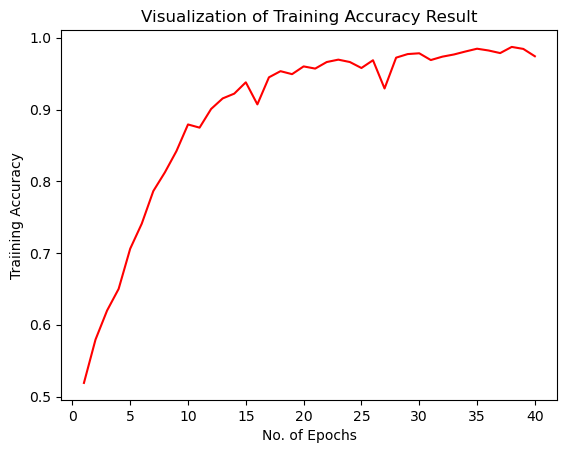

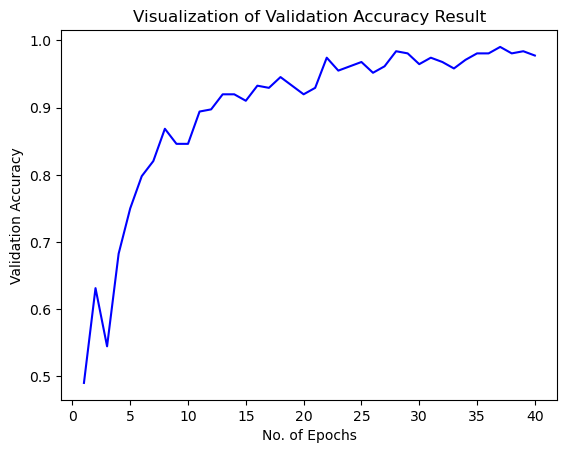

In [151]:
epochs = [i for i in range(1,41)]
plt.plot(epochs,training_history1.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()
     

plt.plot(epochs,training_history1.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

# Multilevel Prediction will be conducted below

# Save the best CNN Model

In [162]:
cnn1.save('FruitVSVeggie.h5')

# Get CNN Models of Vegetable and Fruits categorization

## CNN_VEGGIE

In [235]:
cnn_veggie = tf.keras.models.load_model('CNN_Veggie.h5')

In [236]:
# Test set for veggies classes
test_set_veggie = tf.keras.utils.image_dataset_from_directory(
    '/Users/HP/Documents/PYTHONCODES/DATASETS/FRUITS&VEGGIE(NOOVERSAMPLING)/test/Vegetables',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 210 files belonging to 21 classes.


## For Fruits we need to import 2 models, which are the grayscale and the RGB model

In [237]:
cnn_fruit = tf.keras.models.load_model('CNN_Fruits.h5')
cnn_fruit_gray = tf.keras.models.load_model('CNN_Fruit_gray.h5')

In [238]:
# Test set for fruits classes
test_set_fruit = tf.keras.utils.image_dataset_from_directory(
    '/Users/HP/Documents/PYTHONCODES/DATASETS/FRUITS&VEGGIE(NOOVERSAMPLING)/test/Fruits',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 110 files belonging to 11 classes.


# Model Accuracy testing on Test Images

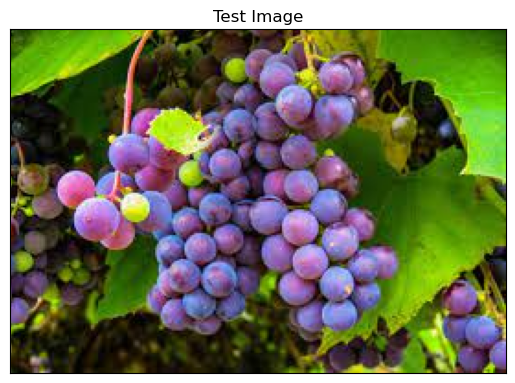

In [272]:
#Test Image Visualization
import cv2

#Fruit Image
image_path = '/Users/HP/Documents/IMGFORPRESENTATION/download (6).jpeg' 

#Vegetable Image
# image_path = '/Users/HP/Documents/IMGFORPRESENTATION/sweetpotatoes_getty2400-56a4975c5f9b58b7d0d7b790.jpg'


# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [273]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions1 = cnn1.predict(input_arr)
predictions_veggie = cnn_veggie.predict(input_arr)

#Fruit predictions
#RGB color
predictions_rgb = cnn_fruit.predict(input_arr)

# Convert the image to grayscale
gray_image = tf.image.rgb_to_grayscale(input_arr[0]).numpy()

# Get predictions from Grayscale model
predictions_gray = cnn_fruit_gray.predict(np.array([gray_image]))

# Combine predictions (example: simple average)
fruit_combined_predictions = (predictions_rgb + predictions_gray) / 2.0

1/1 [==============================] - 0s 18ms/step


In [274]:
print(predictions1)
print("========================")
print(predictions_veggie)
print("========================")
print(fruit_combined_predictions)

[[9.9999988e-01 1.0308643e-07]]
[[1.5070087e-01 2.2715636e-02 5.5432031e-03 4.5452654e-04 4.4084757e-04
  2.3774870e-02 2.0476471e-05 1.3986557e-05 5.0308388e-01 3.4416445e-02
  1.0466586e-02 4.0926434e-06 1.1829696e-01 5.4989170e-02 2.8834047e-03
  7.1605228e-02 2.1720705e-05 4.3633339e-05 5.4708507e-06 3.2542102e-04
  1.9360654e-04]]
[[0.09151699 0.01671607 0.51626974 0.00668333 0.0347955  0.01393745
  0.09764629 0.07616506 0.06789434 0.00532977 0.0730455 ]]


# Prediction between fruits or vegetables

In [275]:
result_index = np.argmax(predictions1)
result_index_veggie = np.argmax(predictions_veggie)
result_index_fruit = np.argmax(fruit_combined_predictions)

if test_set.class_names[result_index] == "Fruits":
    result_str = "It's a {} and it is {}".format(
        test_set.class_names[result_index],
        test_set_fruit.class_names[result_index_fruit]
    )
elif test_set.class_names[result_index] == "Vegetables":
    result_str = "It's a {} and it is {}".format(
        test_set.class_names[result_index],
        test_set_veggie.class_names[result_index_veggie]
    )
else:
    result_str = "Unrecognized category"

print(result_str)


It's a Fruits and it is grapes
